**<font size="5">Goal:**

The following research project aims to develop a model that can predict if a company within any industry is heading toward bankruptcy, assuming it cannot gain access to additional financing. 

**<font size="5">Motivation:**

During my summer internship at Moelis & Company in New York, I developed an interest in the credit side of finance while working on restructuring. My task involved creating credit 
profiles that summarized the capital structure of private and public companies alongside their liquidity position. The companies were selected based on significant fluctuations in the 
market price of their debt across various tranches. It seemed a bit old-fashioned to begin evaluating a company’s financial position based solely on the market price shifts in debt. 
Immediately I began to think about how statistical models could improve the basis on which companies can be screened and even predict the probability of undergoing a Chapter 7 or 
Chapter 11 bankruptcy.  


**<font size="5">Background:**

*<center>If a company fails to pay interest expense or mandatory payment on secured debt, the company has technically entered into default.</center>*
<br>**Chapter 7 Bankruptcy:** The company's assets are sold to pay holders' creditors.<sup>1</sup>
<br>**Chapter 11 Bankruptcy:** Allows the company to continue operations while the business plans to repay or alter credit terms.<sup>2</sup>
<br>**Financial Distress:** Condition in which a company cannot generate sufficient revenue to meet or pay its financial obligations.<sup>3</sup>
<br>**Restructuring:** The company makes significant changes to its capital structure under financial distress.
<br>**Liquidity:** Availability of liquid assets such as cash or short-term investments.

---

The Altman Z-score is a popular model to determine whether a company, specifically within the manufacturing space, is headed for bankruptcy by testing its credit strengths. 

$$ Altman\ Z-Score=1.2{Working\ Capital \over Total\ Assets}+1.4{Retained\ Earnings \over Total\ Assets}+3.3{Earnings\ before\ Interest\ and\ Tax \over Total\ Assets}+0.6{Market\ Value\ of\ Equity  \over Total\ Liabilities}+1.0{Sales \over Total\ Assets}$$

*<font size="2"><center>A score below 1.8 signals that the company will head towards bankruptcy, while anything higher is a sign of good health.<sup>4</sup></center>*

In the 2007 financial crisis, the Altman Z-score was 1.81, signifying a crisis would occur - acting as a predictor for the housing crisis.<sup>4</sup> However, some of the model's shortcomings are its preference for companies in the manufacturing space; thus, the model itself is not generalizable across companies in various industries. So, although the Altman Z-score may be a good macroeconomic indicator, it fails on an individual company basis. Thus, we will aim to train a model that works not only for manufacturing companies but various industries.

---

To analyze the company's financial position, investment banks look at two key financial ratios to determine a company's debt position:

$$ Leverage \ Ratio = {Total \ Debt \over EBITDA} $$

*<font size="2"><center>EBITDA is a proxy of available cash with the potential to pay down debt, and Total Debt is any interest-incurring instrument. Therefore, a high ratio indicates high risk, as the company may not generate enough cash to pay down debt when it matures.</center>*

$$ Coverage \ Ratio = { EBITDA \over Interest \ Expense} $$

*<font size="2"><center>Measures the company's ability to generate enough cash to meet interest payments on the debt. A higher ratio indicates a company's ease of meeting interest payments.</center>*


Furthermore, a company's liquidity is critical during events of stress or distress, as existing cash, unused revolver balance, or letters of credit can grant a company extra money to meet short-term obligations.

$$ Liquidity = Cash + Undrawn\ Revolver\ Balance$$

*<font size="2"><center>Unused Revolver Balance is the amount a company can draw from a credit facility. </center>*

---

The research report, *Bankruptcy prediction and the discriminatory power of annual reports: empirical evidence from financially distressed German companies*, has taken a different approach to predicting a company going bankrupt, moving away from financial ratios and taking a look at the structural and linguistic characteristics of a company's annual report.<sup>5</sup> The report found that the qualitative data in financial statements helped discriminate between bankrupt companies and those facing financial stress. <sup>5</sup>

**<font size="5">Dataset:**

A dataset from Kaggle will be analyzed: *Company Bankruptcy Prediction*.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Read dataset
bank_df= pd.read_csv("bankruptcy_prediction.csv")
# Remove any rows that are not finite or contain Nan values
bank_df = bank_df[np.isfinite(bank_df).all(1)]
# Shows the columns that have any Nan values
columns_with_na = bank_df.columns[bank_df.isna().any()].tolist()
print(columns_with_na)

[]


---
The *Company Bankruptcy Prediction* dataset contains bankruptcy information from Tawain ranging from the years of 1999 to 2009.<sup>6</sup> The dataset encompasses 6,819 companies with 93 unique financial ratios. Most importantly, the data is classified as 1 = Bankruptcy and 0 = No Bankruptcy.<sup>6</sup> The bankruptcy that took place was within the limits of Tawainese regulation.

**<center>93 financial ratios will initially act as the explanatory variables to predict the response variable "Bankruptcy." The prediction process will utilize binary classification to determine whether the company is currently in a state of financial distress/bankruptcy or is in a stable financial position. An accurate model would have significant implications for screening distressed investments by hedge funds, private equity, and investment banks, making it easier to identify investment opportunities.<center>**

In [2]:
# Explanatory Variables
X = bank_df.iloc[:, 1:]
# Response Variable
y = bank_df.iloc[:, 0]

In [3]:
X.describe()

ROA(C) before interest and depreciation before interest  \
count                                        6819.000000          
mean                                            0.505180          
std                                             0.060686          
min                                             0.000000          
25%                                             0.476527          
50%                                             0.502706          
75%                                             0.535563          
max                                             1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)  ...  \
count                            6819.000000  ...   
mean                                0.781381  ...   
std                                 0.012679  ...   
min                                 0.000000  ...   
25%                                 0.781567  ...   
50%                                 0.781635  ...   
75%                                 0.781735  ...   
max 

*<font size="4"><center>Notable Features</center>*

Financial Ratios are typically split across six buckets:

*<center>Profitability | Leverage | Liquidity | Activity | Coverage | Market Prospects<sup>7</sup></center>*

<br> **Profitability:** Convey how well a company can generate profit from operations.
<br> **Leverage:** Compares debt levels to assets, equity, and earnings.
<br> **Liquidity:** Measures a company's ability to pay of its short-term debt. 
<br> **Activity:** Company's ability to use its assets and liabilities to generate sales. 
<br> **Coverage:** Ability to make interest payments on debt.
<br> **Market Prospects:** Insight into the potential future performance of a company's stock or overall market.

*<center>Notable feaures from the dataset:</center>*

<br>**Cash Flow Rate:** The ability of the company's day-to-day cash generation to cover short-term commitments.
<br>**Debt Ratio:** Percentage of liabilities to total assets.
<br>**Coverage Ratio:** Company's ability to meet financial obligations like interest expense.
<br>**Operating Gross Margin:** Gross profit as a percentage of sales.

In [4]:
# Change dtype of each column
bank_df['Bankrupt?'] = bank_df['Bankrupt?'].astype(float)

*<font size="2"><center>Based on the data above, columns "Bankrupt?" will be changed into float64 to match the rest of the datatypes. This will prevent any potential issues that may arise during the implementation of algorithms in the future.</center>*

---
*<font size="4"><center>Data Analysis & Visualization </center>*

Visualizing data with a large number of features can be challenging and computationally demanding. Therefore, to analyze any underlying patterns in the data, we will use Principal Component Analysis (PCA).

In [5]:
num_net_income_flag = X.groupby(X[" Net Income Flag"]).size()
num_liability_assets_flag = X.groupby(X[" Liability-Assets Flag"]).size()
print(num_net_income_flag)
print(num_liability_assets_flag)

 Net Income Flag
1    6819
dtype: int64
 Liability-Assets Flag
0    6811
1       8
dtype: int64


*<font size="2"><center>It seems that the Net Income Flag column only contains a flag of 1. As a result, this column provides no meaningful variation and can be dropped from the features. Similarly, the Liability-Assets Flag column indicates only 8 instances where liabilities are greater than assets. Since this column contains little variation to support its use, it can also be dropped from the features.</center>*

In [6]:
X = X.drop(' Net Income Flag', axis=1)
X = X.drop(' Liability-Assets Flag', axis=1)
len(X.columns)

93

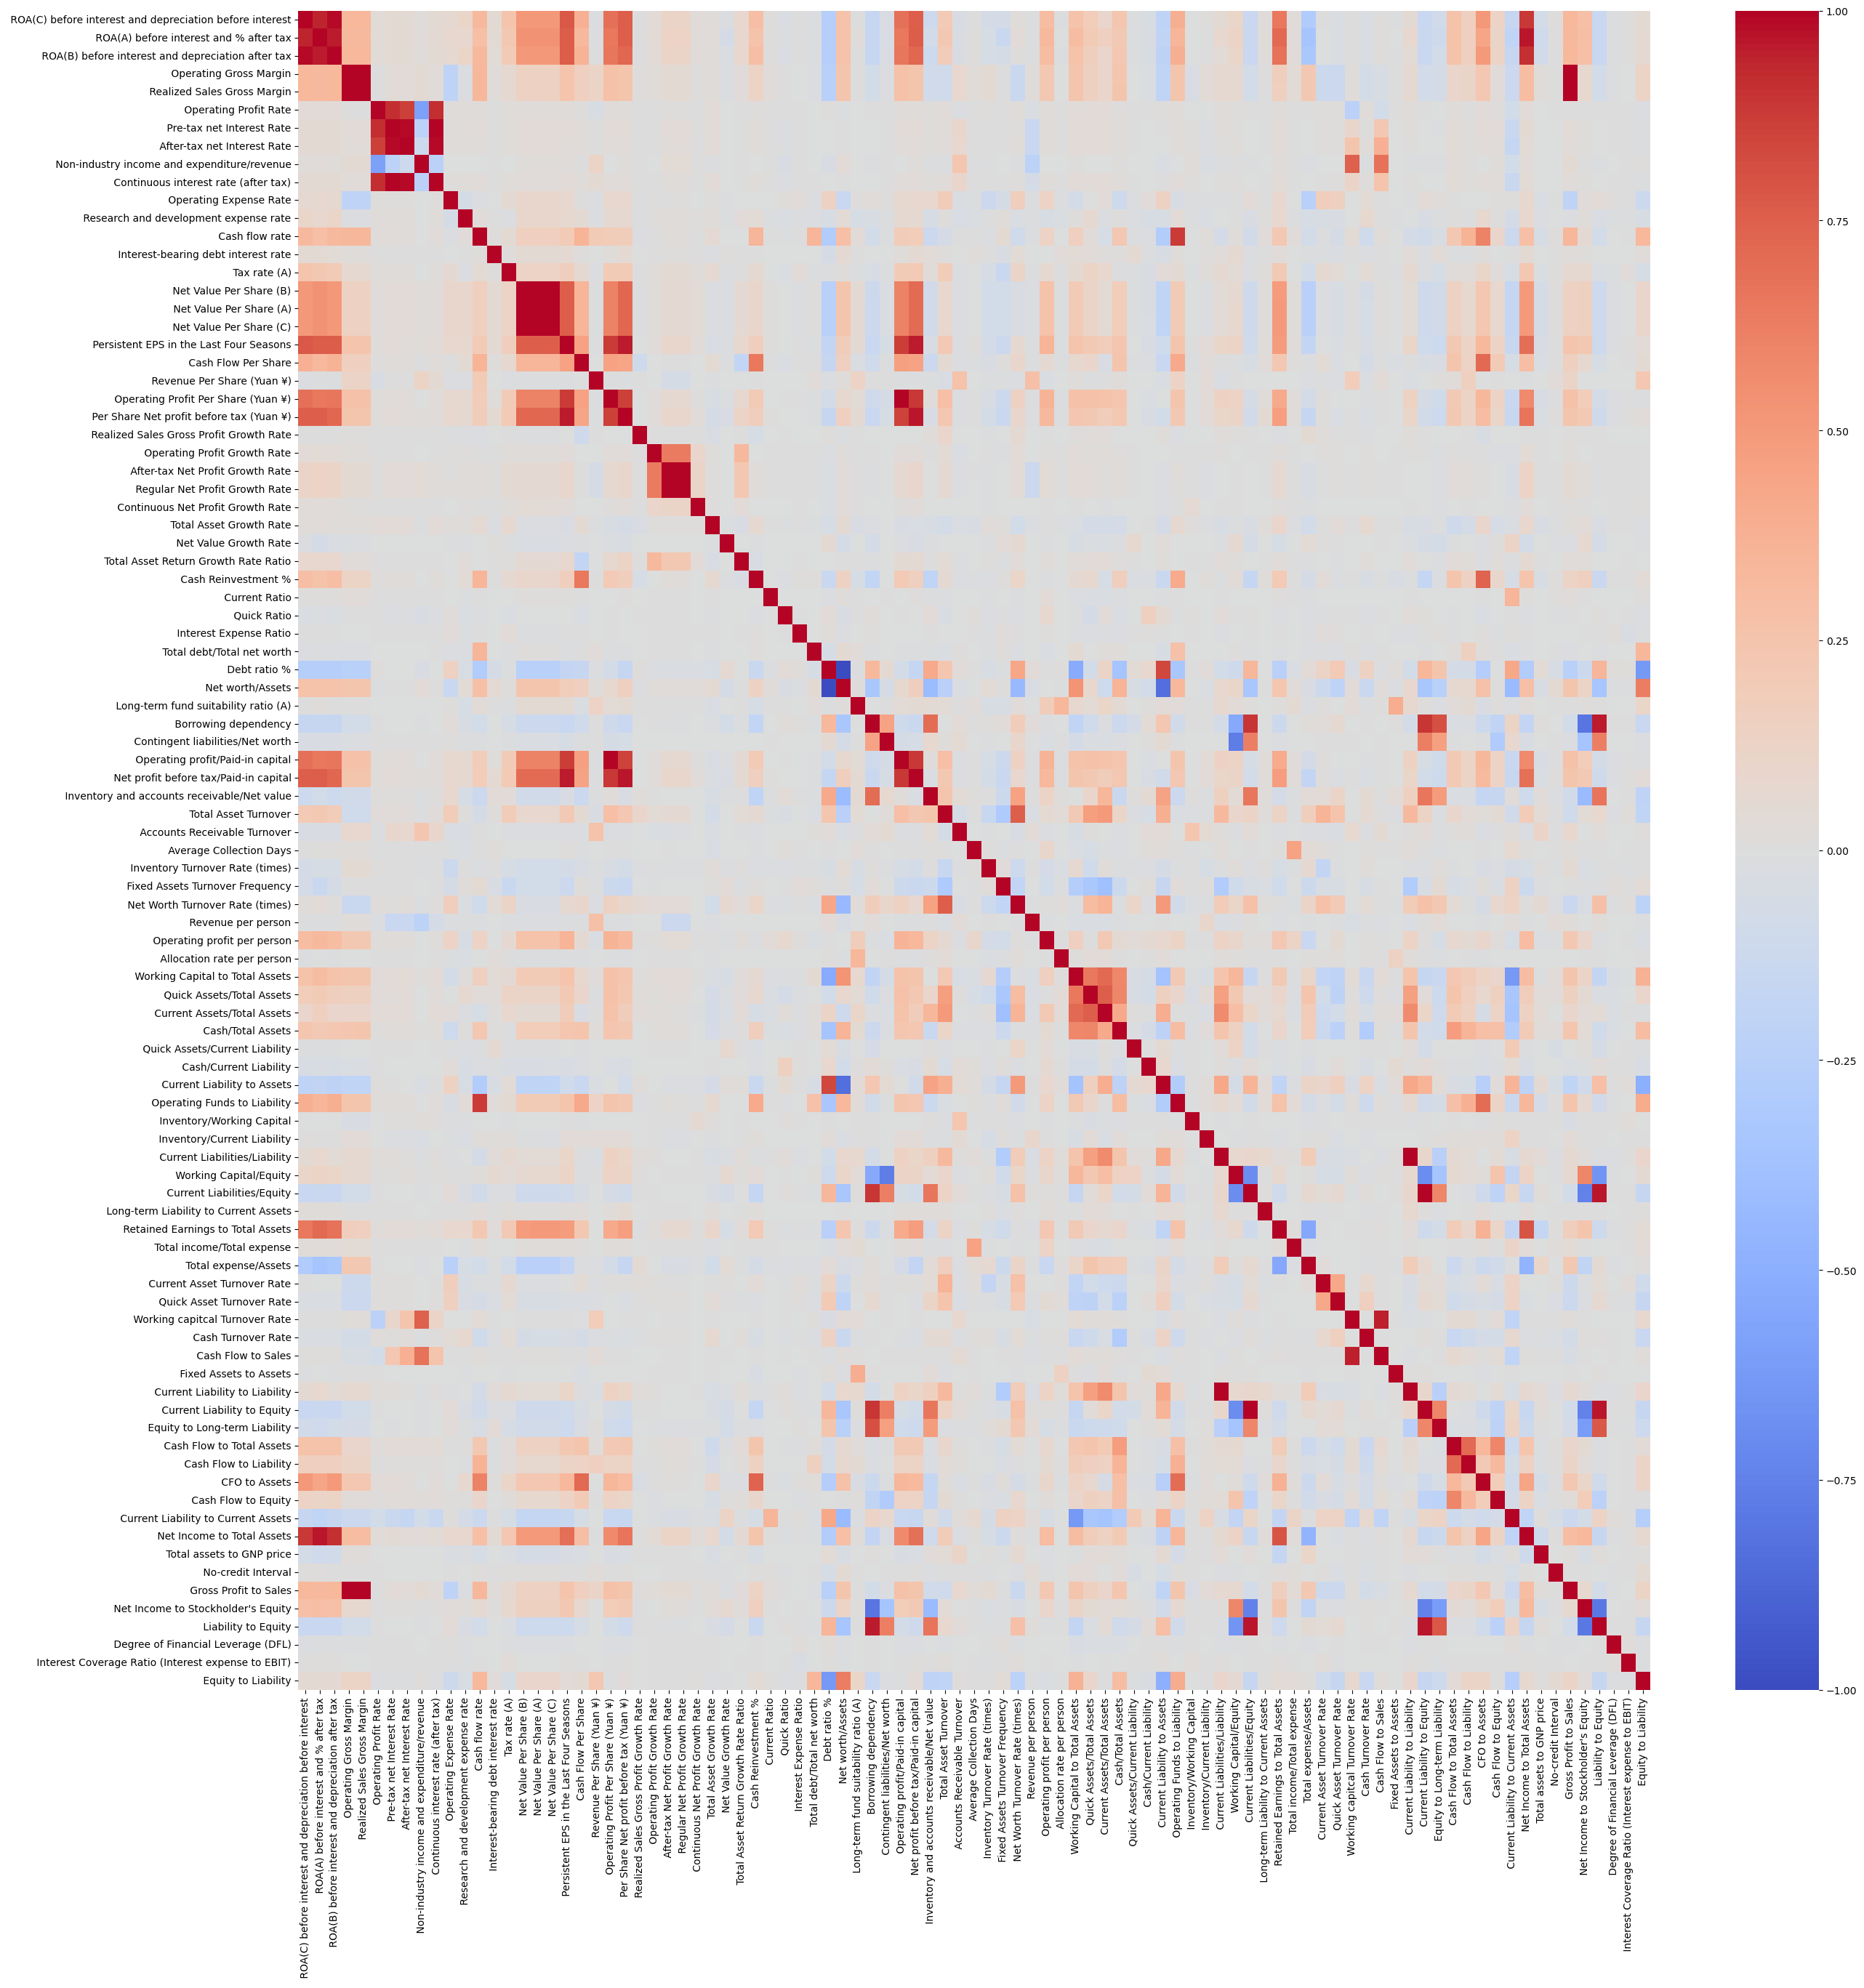

In [7]:
import seaborn as sns
# Plot correlation matrix using a heatmap
plt.figure(figsize=(30,30))
sns.heatmap(X.corr(), cmap='coolwarm')
plt.show()

*<font size="2"><center>In the correlation matrix, there are many instances of strong positive and negative correlations among features. There is the existence of a high level of multicollinearity among many variables.</center>*

Standardize the features and split the dataset across testing and training.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Function of StandardScaler
scaler = StandardScaler()
# Fit X and normalize the features
column_names = X.columns.tolist()
# Transform data using a scaler
scaler.fit(X)
X = scaler.transform(X)
# Create a data frame with the standardized data and column names
X = pd.DataFrame(X, columns=column_names)
# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [9]:
from sklearn.decomposition import PCA
"""pca_visualization function will reduce a dataset with n features to 3 components 
   and graph the components in three-dimensional space while classifying each data 
   point in color by its response variable."""
def pca_visualization(X, y, elevation):
    # Colors for the graph
    light_green = '#90EE90' 
    dark_blue = '#00008B' 
    # PCA declaration
    pca = PCA(n_components=3)
    X3D = pca.fit_transform(X)
    df_pca = pd.DataFrame(X3D, columns=['PC1', 'PC2', 'PC3'])
    # Add the y to the dataset
    y = y.to_frame('Bankruptcy').reset_index(drop=True)
    df_pca = pd.concat([df_pca, y], axis=1)
    # Plot the PCA components, highlighting them based on the classification of the response variable
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(projection='3d')
    # Graph the components
    ax.scatter(df_pca[df_pca['Bankruptcy'] == 0]['PC1'], df_pca[df_pca['Bankruptcy'] == 0]['PC2'], 
               df_pca[df_pca['Bankruptcy'] == 0]['PC3'], c = light_green, label = 'Non-Bankrupt')
    # Overlap the Bankrupt with Non-Bankrupt instances
    ax.scatter(df_pca[df_pca['Bankruptcy'] == 1]['PC1'], df_pca[df_pca['Bankruptcy'] == 1]['PC2'], 
               df_pca[df_pca['Bankruptcy'] == 1]['PC3'], c = dark_blue, label = 'Bankrupt')
    ax.view_init(elev=elevation, azim=50)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.legend()
    plt.show()

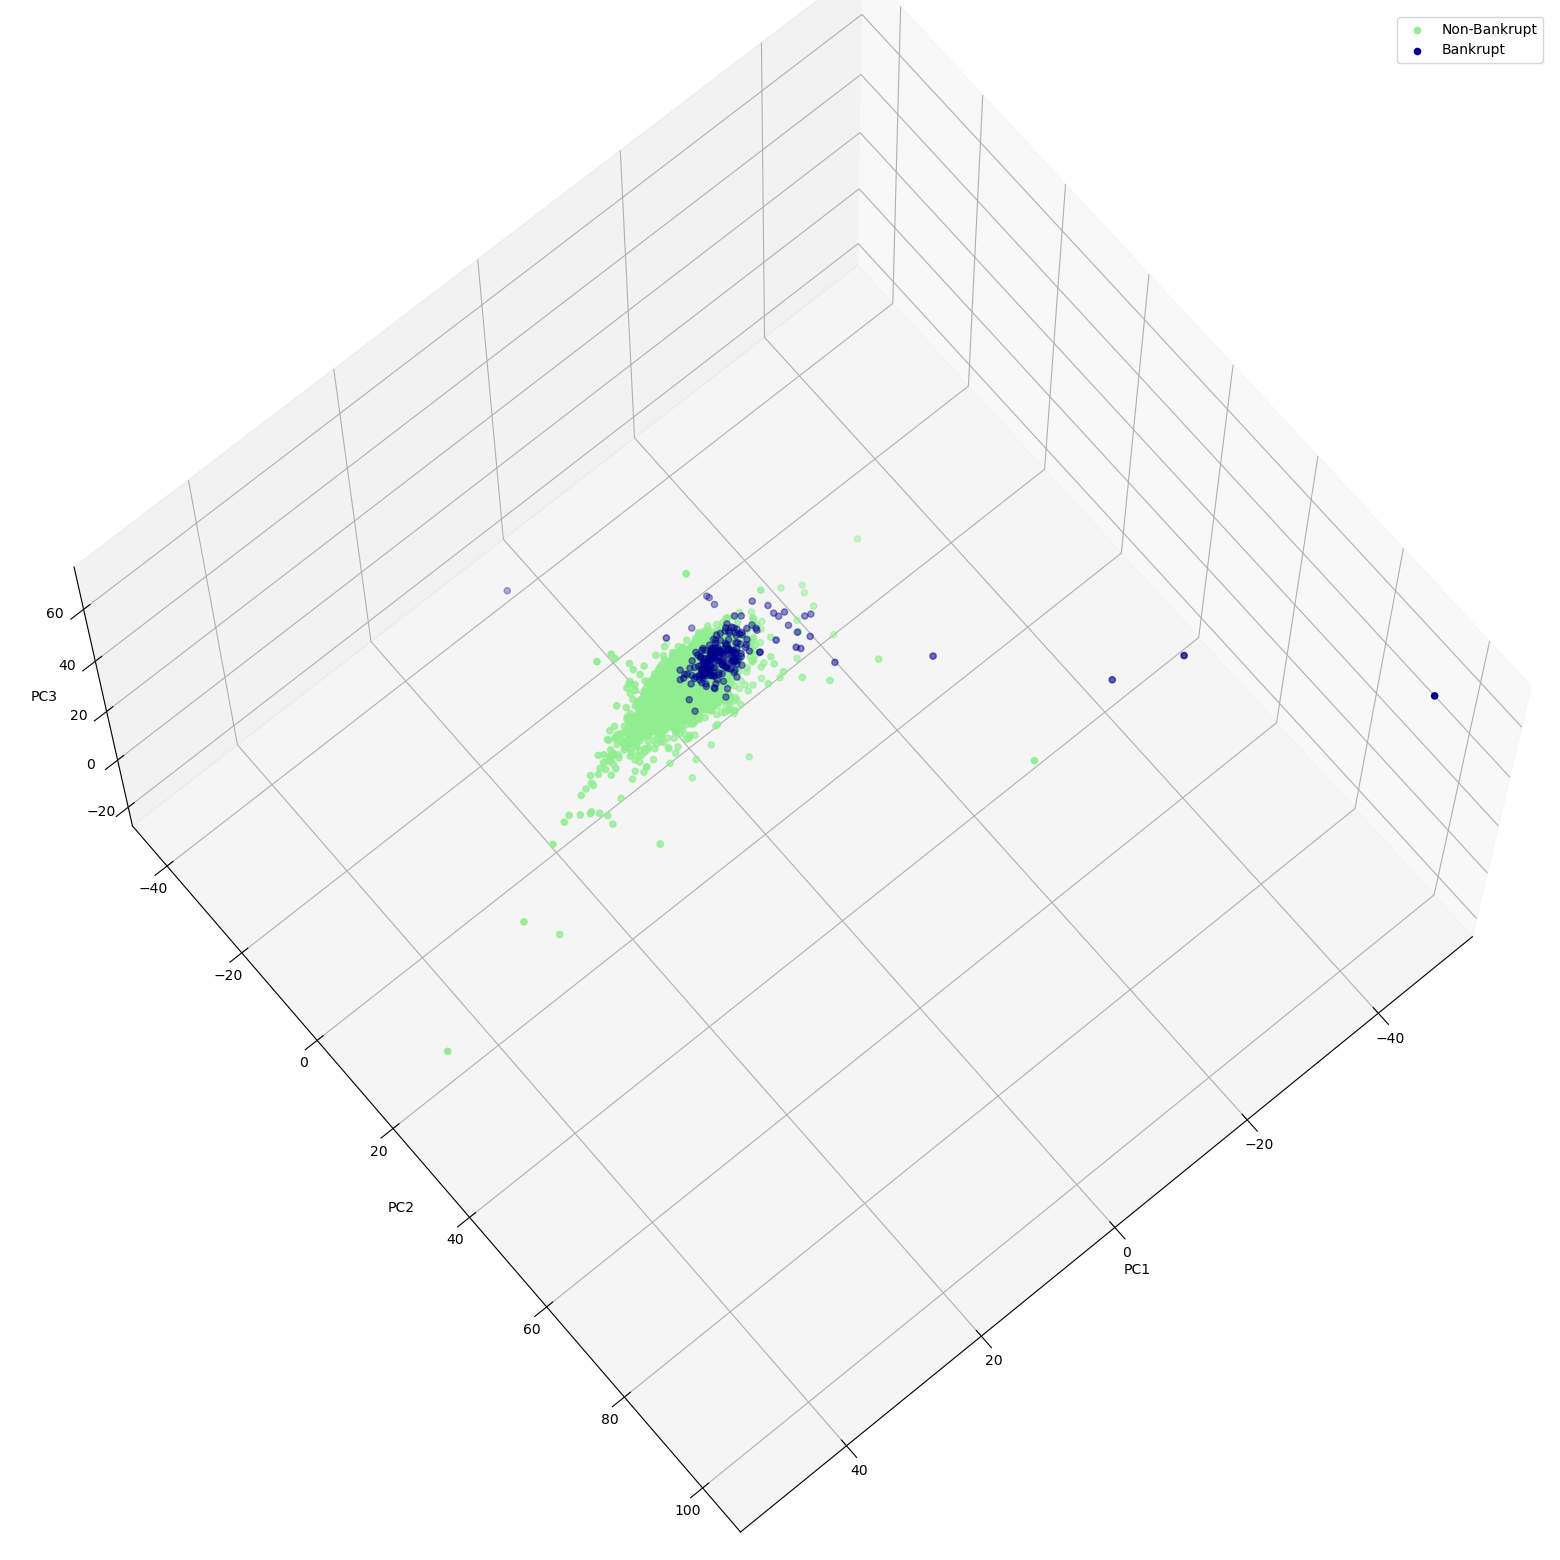

In [10]:
pca_visualization(X, y, 70)

*<font size="2"><center>After reducing the dimensionality of the dataset consisting of 93 financial ratios, there appears to be a centralization of observations with Bankrupt and Non-Bankrupt instances overlapping. There are observations that exist outside the cluster, both Bankrupt and Non-Bankrupt. Interestingly the Bankrupt instances only take place below 0 in PC1, with the exception of one case.</center>*

In [11]:
pca = PCA()
pca.fit(bank_df)
cumsum = np.cumsum(pca.explained_variance_ratio_)
# Capturing at least 95% of the variability in the dataset
d = np.argmax(cumsum >= 0.95) + 1
print("n Dimensions: " + str(d))

n Dimensions: 8


To capture at least 95% of the variability in the data, we have to use eight principal components. This suggests that the dataset has a complex structure and that a relatively large number of features are required to describe its variance.

In [12]:
columns_ = bank_df.columns
num_pc = d
# Iterate through each PC to find the largest value that accounts for variance
for value in np.arange(num_pc):
    input_list = pca.components_[value]
    index = [index for index, item in enumerate(input_list) if item == input_list.max()]
    print("PC" + str(value + 1) + " " + str(columns_[index][0] + ": " + str(input_list[index][0])))

PC1  Quick Asset Turnover Rate: 0.6713563367601042
PC2  Inventory Turnover Rate (times): 0.7698179512194367
PC3  Operating Expense Rate: 0.812649178810887
PC4  Total Asset Growth Rate: 0.6407899938064151
PC5  Cash Turnover Rate: 0.6320250187572218
PC6  Research and development expense rate: 0.904031963105138
PC7  Fixed Assets Turnover Frequency: 0.9587583705789046
PC8  Current Asset Turnover Rate: 0.8216726046347916


Quick Asset Turnover Rate accounts for 67% of the variance under PC1, followed by an Inventory Turnover Rate of 76% for PC2. Quick Asset Turnover Rate measures how efficiently a company's assets are being used to generate revenue, while Inventory Turnover Rate measures the frequency at which inventory is sold. A low Quick Asset Turnover Rate or Inventory Turnover Rate can indicate a need to improve efficiency in asset utilization or stagnant sales. This could lead to financial distress or bankruptcy if left unchecked.

In summary, based on the 8 PC, the most relevant features are the following: Quick Asset Turnover, Inventory Turnover Rate, Operating Expense Rate, Total Asset Growth Rate, Cash Turnover Rate, Research, and Development Expense Rate, and Fixed Assets Turnover Frequency. 

The findings are surprising since investment banks typically look at debt-related ratios such as the leverage and coverage ratio. However, based on the PCs, revenue and asset-related ratios capture the most variability of the dataset. However, further analysis is required to identify the most critical variables since these only capture the most variability.

---
Due to the large number of ratios in the dataset and lack of visible patterns under PCA, we will utilize the MDS algorithm to visualize the proximity of features from each other in the dataset. This visualization will help us determine which statistical machine-learning model to select for our analysis.

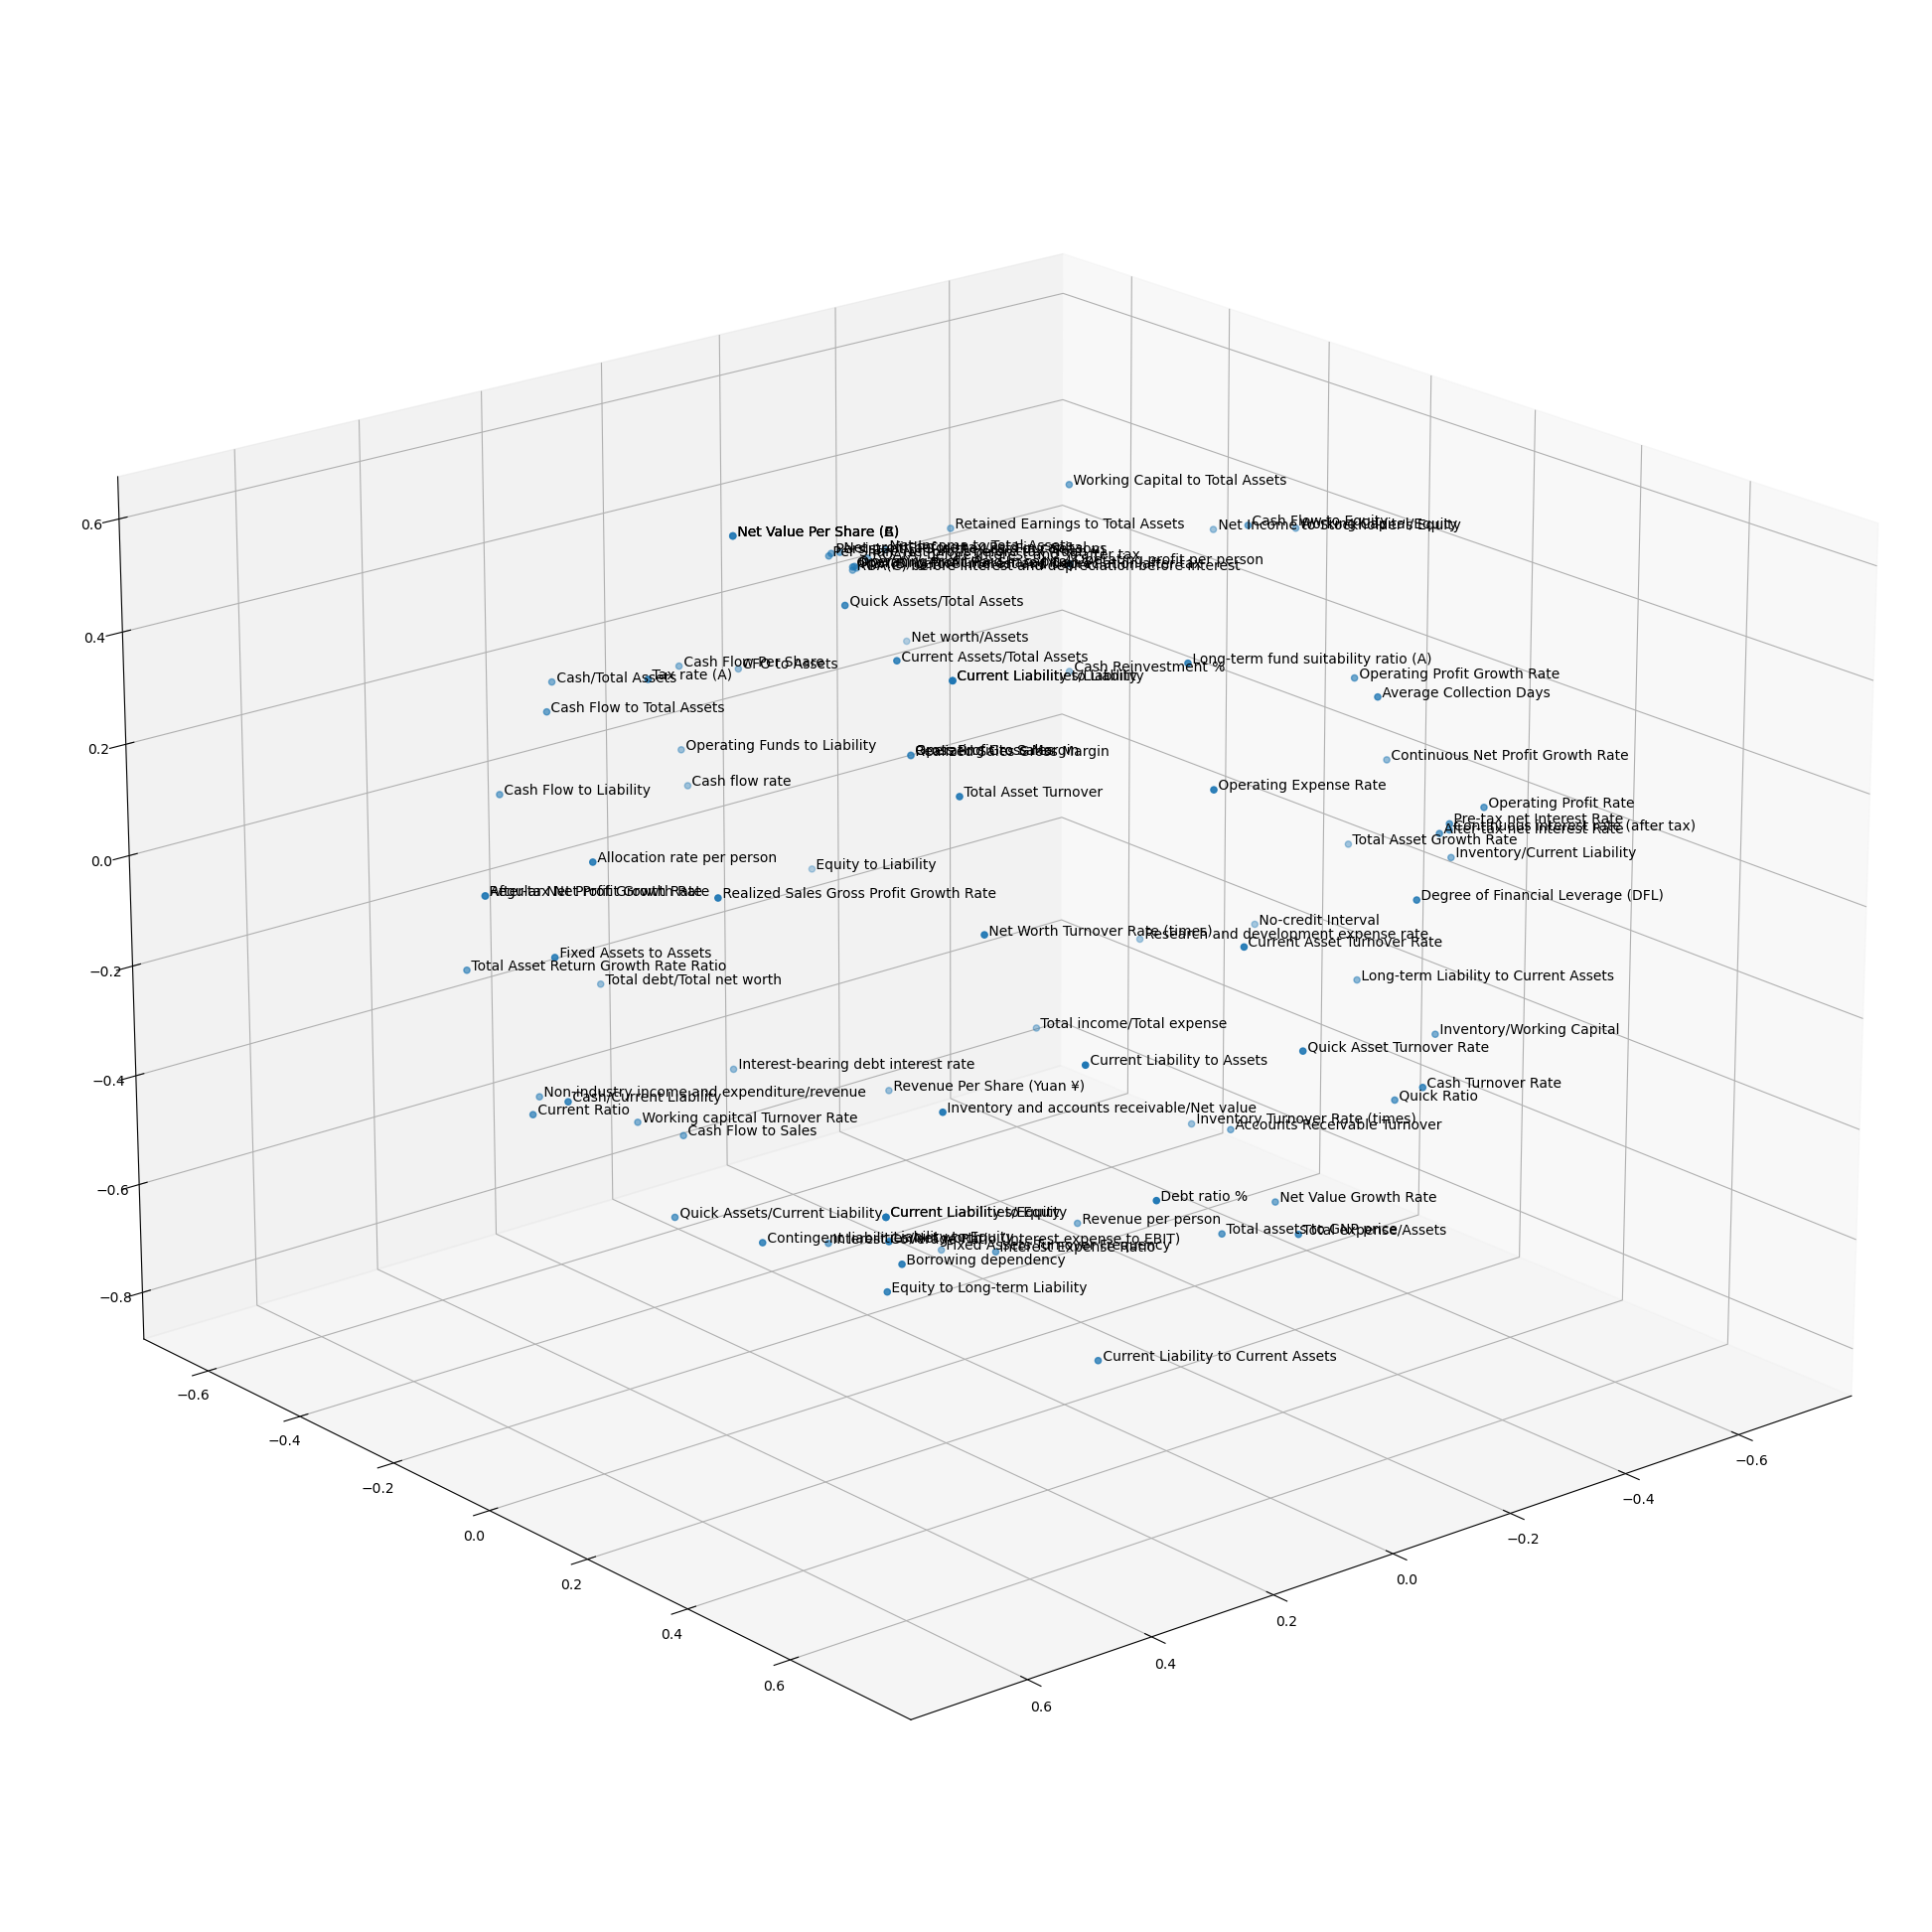

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
# Define the label 
labels = list(X.columns)
# Normal the corr values
corrmat = X.corr()
corr_dmatrix = 1 - corrmat
# Create MDS to 3D
model_bank = MDS(n_components=3, dissimilarity='precomputed', random_state=1)
mds_out_bank = model_bank.fit_transform(corr_dmatrix)
# Reference PCA 1 and 2 for the appropriate axis
X3D = mds_out_bank[:,0]
Y3D = mds_out_bank[:,1]
Z3D = mds_out_bank[:,2]
# Create the graph 
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(projection='3d')
ax.set_aspect('auto')
ax.view_init(elev=20, azim=50)
ax.scatter3D(X3D, Y3D, Z3D)
# Labels for data points
for i, label in enumerate(labels):
    ax.text(X3D[i], Y3D[i], Z3D[i], label, fontsize=10)  

*<font size="2"><center>Based on the 3D MDS graph, we can observe that specific data points overlap entirely, while others will be near each other in clusters. Some clusters include Fixed Assets to Assets, Total Asset Return Growth Rate Ratio, and Total Debt/Total Net Worth. Generally, there is a significant amount of distance across the features. There is the existence of a high level of multicollinearity among many variables, supporting the findings of the correlation matrix.<sup>8</sup></center>*

---
We will now determine how many instances of Bankrupt events are prevalent in the dataset relative to Non-Bankrupt.

In [14]:
"""count_bankruptcies function will graphically represent the class imbalance
   between Bankrupt and Non-Bankrupt instances."""
def count_bankruptcies(y_): 
    # Count the number of Bankrupt and Non-Bankrupt instances 
    num_bankruptcies = y_.groupby(y_).count()
    plot = num_bankruptcies.plot(kind="bar", color="darkgreen")
    # Set the labels
    plot.set_xticklabels(['Non-Bankrupt', 'Bankrupt'], rotation=0)
    plt.ylabel('Count')
    # % of Bankrupt instances
    print(num_bankruptcies)
    print("\n% of Bankruptcy Occurrences: {:.0%}".format(num_bankruptcies[1] / (num_bankruptcies[0] + num_bankruptcies[1])))

Bankrupt?
0    6599
1     220
Name: Bankrupt?, dtype: int64

% of Bankruptcy Occurrences: 3%


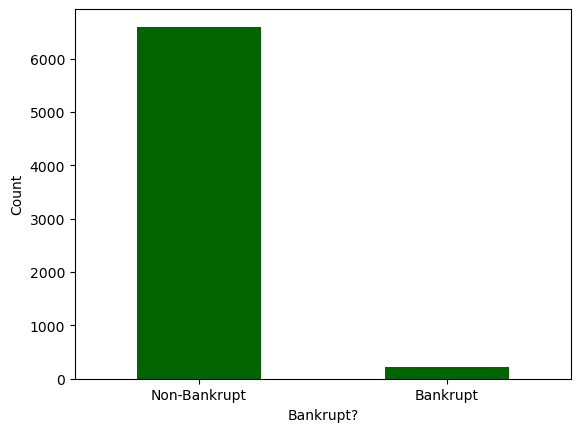

In [15]:
# Function that will create plot of Bankruptcies vs Non-Bankruptcies
count_bankruptcies(y)

*<font size="2"><center>There appears to be an insignificant amount of bankruptcies relative to the entire dataset.</center>*

The dataset indicates a relatively low frequency of bankruptcy, comprising only 3% or 220 of 6,599 companies of the total data. This is to be expected, as bankruptcy is an infrequent event that occurs only a few times a year. However, this becomes problematic when using binary classification, as the model may need more Bankrupt instances to form a generalization of factors that lead to bankruptcy or normality. 

When dealing with highly improbable events, it's essential to choose a model that can handle the disproportional nature of the data. The models must also account for clustering and multicollinearity, impacting model performance. Additionally, the models must work well when dealing with a relatively small dataset with high dimensionality, as the current dataset has 93 features.

**<font size="5">Model Selection & Data Augmentation:**


Before training the dataset, we will perform three versions of data scaling: ADASYN, Naïve Oversampling, and Random Undersampling. This is a necessary step to address the lack of representation in Bankruptcy cases, as the model may only learn from Non-Bankrupt instances. 

The following are the models that will be used:
<br>**KNN:** Non-probabilistic model, which uses a distant algorithm and works well with small datasets.<sup>9</sup>
<br>**Extreme Gradient Boosting:** Contrary to traditional Gradient Boosting, XGBoost uses its own method of building trees where the Similarity Score and Gain determine the best node splits.<sup>10</sup>
<br>**Ridge Classifier:** Utilizes a form of regularization that penalizes model coefficients to prevent overfitting.<sup>11</sup>
<br>**Support Vector Machine:** Finds the optimal hyperplane that best separates the data points of different classes in a high-dimensional space.<sup>12</sup>

Moreover, we will utilize Forward Stepwise Selection as a method to identify the most relevant features for predicting the response variable.

*<font size="4"><center>Data Augmentation: ADASYN, Naïve Oversampling, Random Undersampling, and Controlled Undersampling</center>*

Bankrupt?
0    4631
1     142
Name: Bankrupt?, dtype: int64

% of Bankruptcy Occurrences: 3%


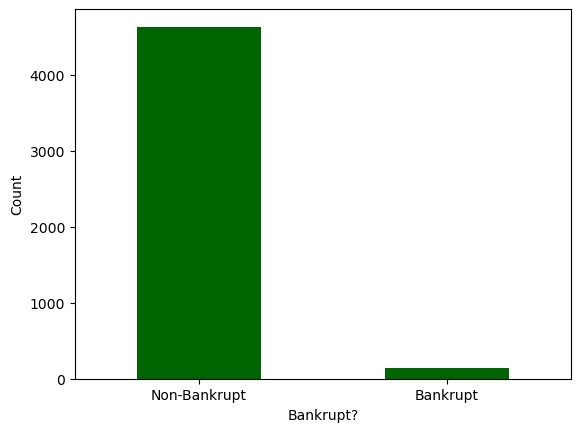

In [16]:
# Function that will create a plot of Bankruptcies vs. Non-Bankruptcies
count_bankruptcies(y_train)

*<font size="2"><center>Just like the entire dataset, the training subset has an insignificant amount of training material for Bankruptcy cases. The training subset also has 3% observations of Bankrupt instances, indicating the sample is a representation of the total dataset.</center>*

---
ADASYN: We will be using the Adaptive Synthetic Variation (ADASYN) of smote to generate synthetic "harder to learn" data points, in this instance, cases of Bankruptcy scenarios. 

In [144]:
from imblearn.over_sampling import ADASYN
print("Current Number of Training Observations: {}".format(len(X_train)))

Current Number of Training Observations: 4773


In [145]:
adasyn = ADASYN(random_state=42)
# Perform oversampling on the training set
X_train_resampled_ADASYN, y_train_resampled_ADASYN = adasyn.fit_resample(X_train, y_train)

In [146]:
print("New Number of Training Observations: {}".format(len(X_train_resampled_ADASYN)))

New Number of Training Observations: 9309


Bankrupt?
0    4631
1    4678
Name: Bankrupt?, dtype: int64

% of Bankruptcy Occurrences: 50%


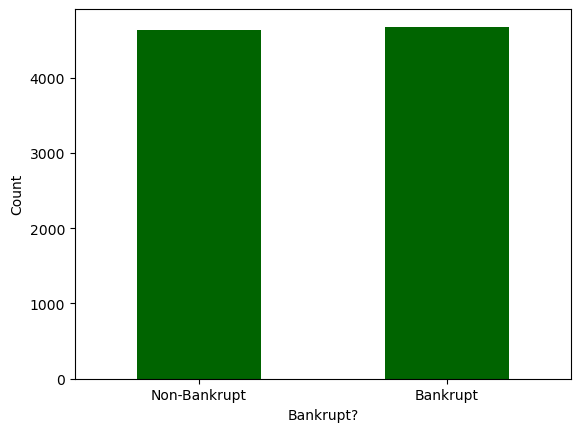

In [147]:
# Function that will create a plot of Bankruptcies vs. Non-Bankruptcies
count_bankruptcies(y_train_resampled_ADASYN)

*<font size="2"><center>Unlike the dataset and normal training subset, the ADASYN enhanced training subset has an approximately equal amount of Bankrupt and Non-Bankrupt cases. Bankrupt observations increased by 3,194% from 142 to 4,678.</center>*

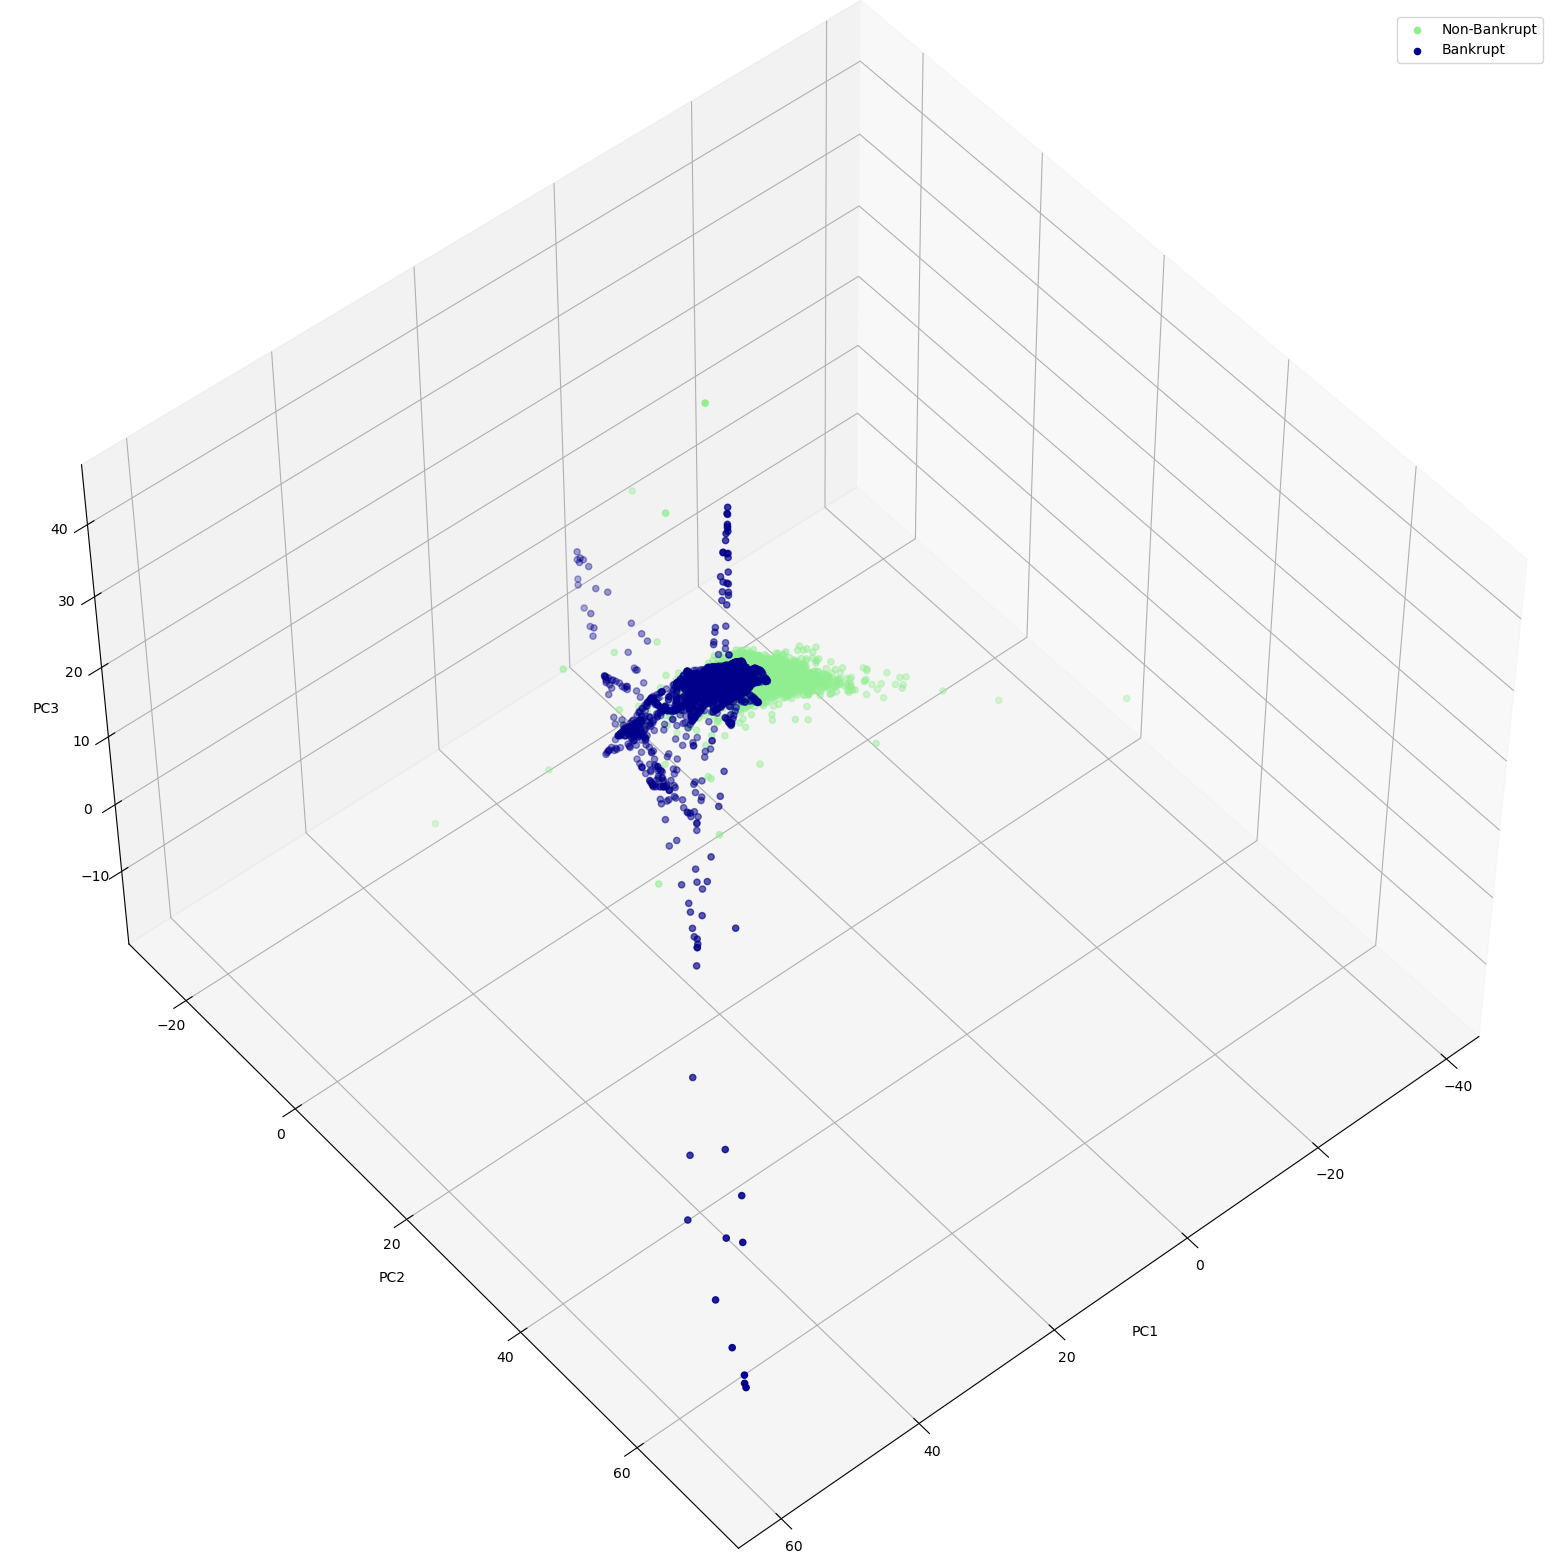

In [148]:
pca_visualization(X_train_resampled_ADASYN, y_train_resampled_ADASYN, 50)

*<font size="2"><center>After applying PCA to reduce the dimensionality of the dataset to 2 components, we observed a significant overlap between Non-Bankrupt and Bankrupt classifications. This overlap persists even after accounting for the effect of ADASYN. Notably, we found a substantial increase in the number of Bankrupt observations that do not fall within the boundaries of the observed cluster. Additionally, we observed that Bankrupt instances do not cross a certain threshold in the graph, while Non-Bankrupt data points do. This suggests that although there is overlap in both states, Bankrupt observations do not have a specific characteristic that Non-Bankrupt data points exhibit.</center></font>*

---
Naïve Oversampling: Adding copy observations from the minority classes to the training dataset, effectively increasing the class imbalance of Bankruptcy cases.

In [149]:
df = pd.concat([X_train, y_train], axis=1)

In [150]:
# Separate minority and majority class samples
minority_class = df[df["Bankrupt?"] == 1]  
majority_class = df[df["Bankrupt?"] == 0] 
# Oversample the minority class
oversampled_minority_class = minority_class.sample(n=len(majority_class), replace=True, random_state=42)
# Concatenate the oversampled minority class with the majority class
df_oversampled = pd.concat([oversampled_minority_class, majority_class], axis=0)
# X and y split
y_n_oversampling = df_oversampled["Bankrupt?"]
X_n_oversampling = df_oversampled.drop("Bankrupt?", axis=1)

Bankrupt?
0    4631
1    4631
Name: Bankrupt?, dtype: int64

% of Bankruptcy Occurrences: 50%


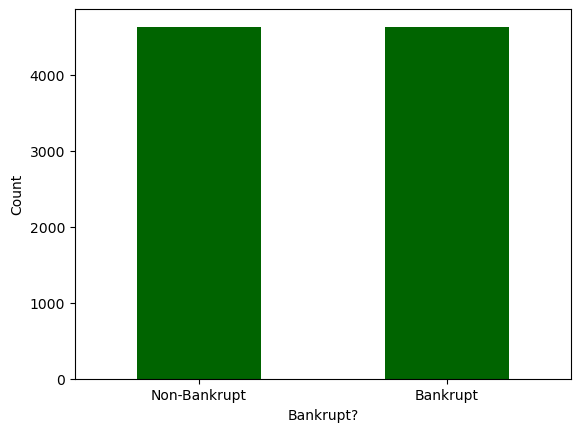

In [151]:
# Function that will create plot of Bankruptcies vs Non-Bankruptcies
count_bankruptcies(y_n_oversampling)

*<font size="2"><center>Unlike the entire dataset and normal training subset, the Naïve Oversampling subset is equal in the amount of Bankrupt and Non-Bankrupt cases, with a significant amount of observations.</center>*

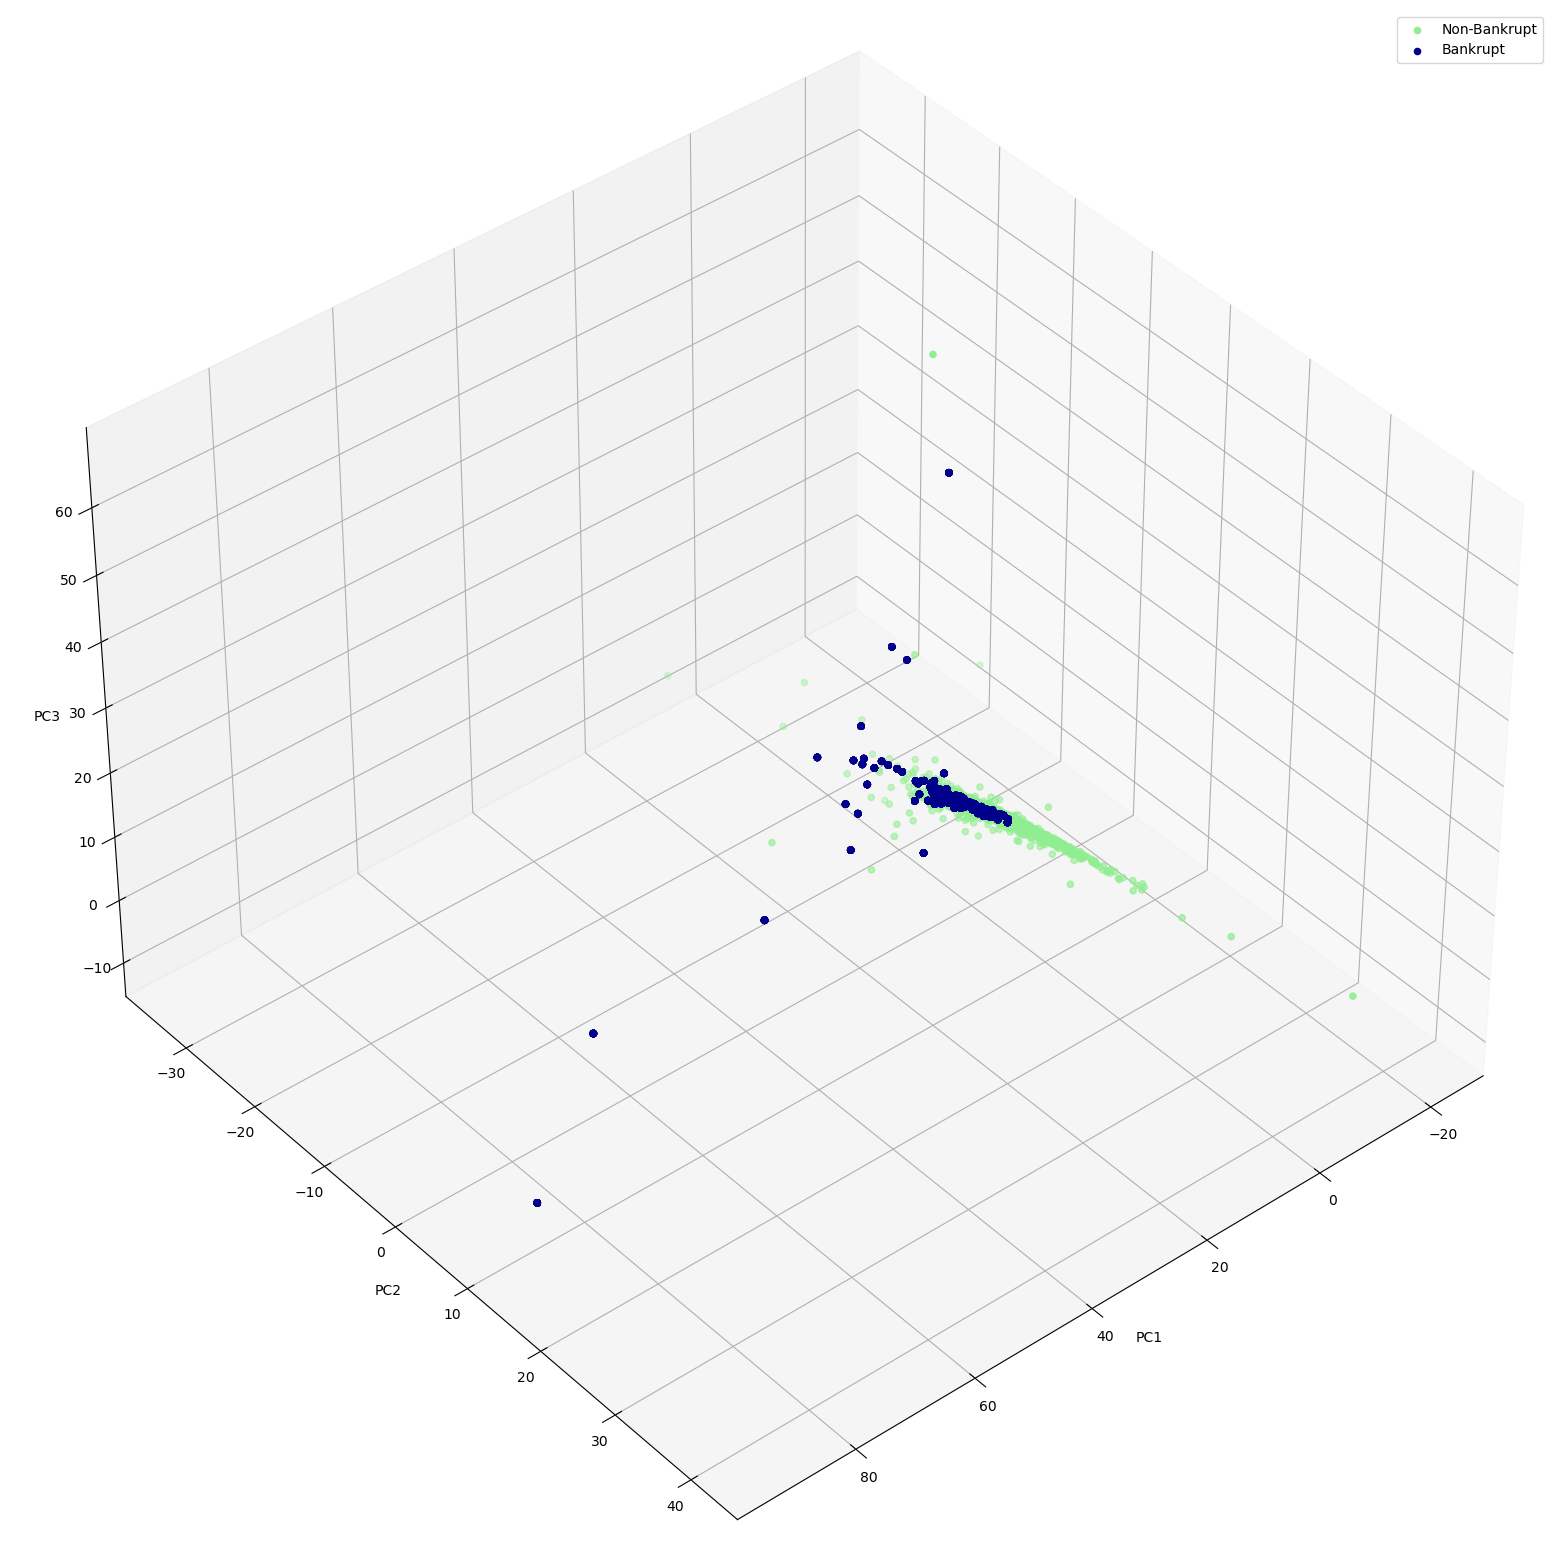

In [152]:
# Function that will create plot of Bankruptcies vs Non-Bankruptcies
pca_visualization(X_n_oversampling, y_n_oversampling, 40)

*<font size="2"><center>After using PCA to reduce the dimensionality to three components, there appears to be a continued imbalance between Non-Bankrupt and Bankrupt. However, since we used the Naïve Oversampling technique to generate additional samples for the Bankrupt class, these new samples will overlap with the existing samples from the dataset when visualized.</center>*

---
Random Undersampling: Undersampling the observations of the majority class so the minority class is a larger percentage of the training data.

In [153]:
from imblearn.under_sampling import RandomUnderSampler
# Calling the undersampling function
rus = RandomUnderSampler(random_state=24)
X_resampled_undersampled, y_resampled_undersampled = rus.fit_resample(X_train, y_train)

Bankrupt?
0    142
1    142
Name: Bankrupt?, dtype: int64

% of Bankruptcy Occurrences: 50%


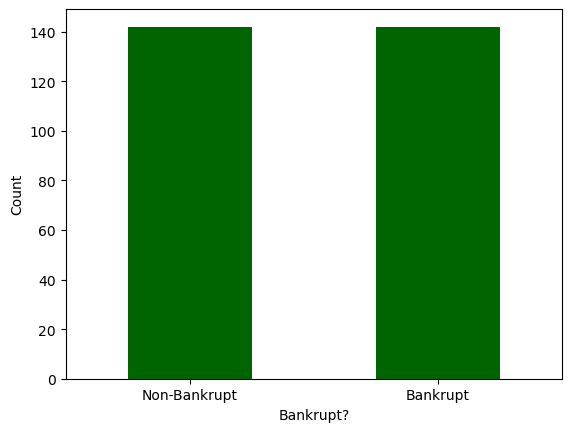

In [154]:
# Function that will create a plot of Bankruptcies vs. Non-Bankruptcies
count_bankruptcies(y_resampled_undersampled)

*<font size="2"><center>Unlike the entire dataset and normal training subset, the Naïve Oversampling subset is equal in the amount of Bankrupt and Non-Bankrupt cases, but there are not enough observations.</center>*

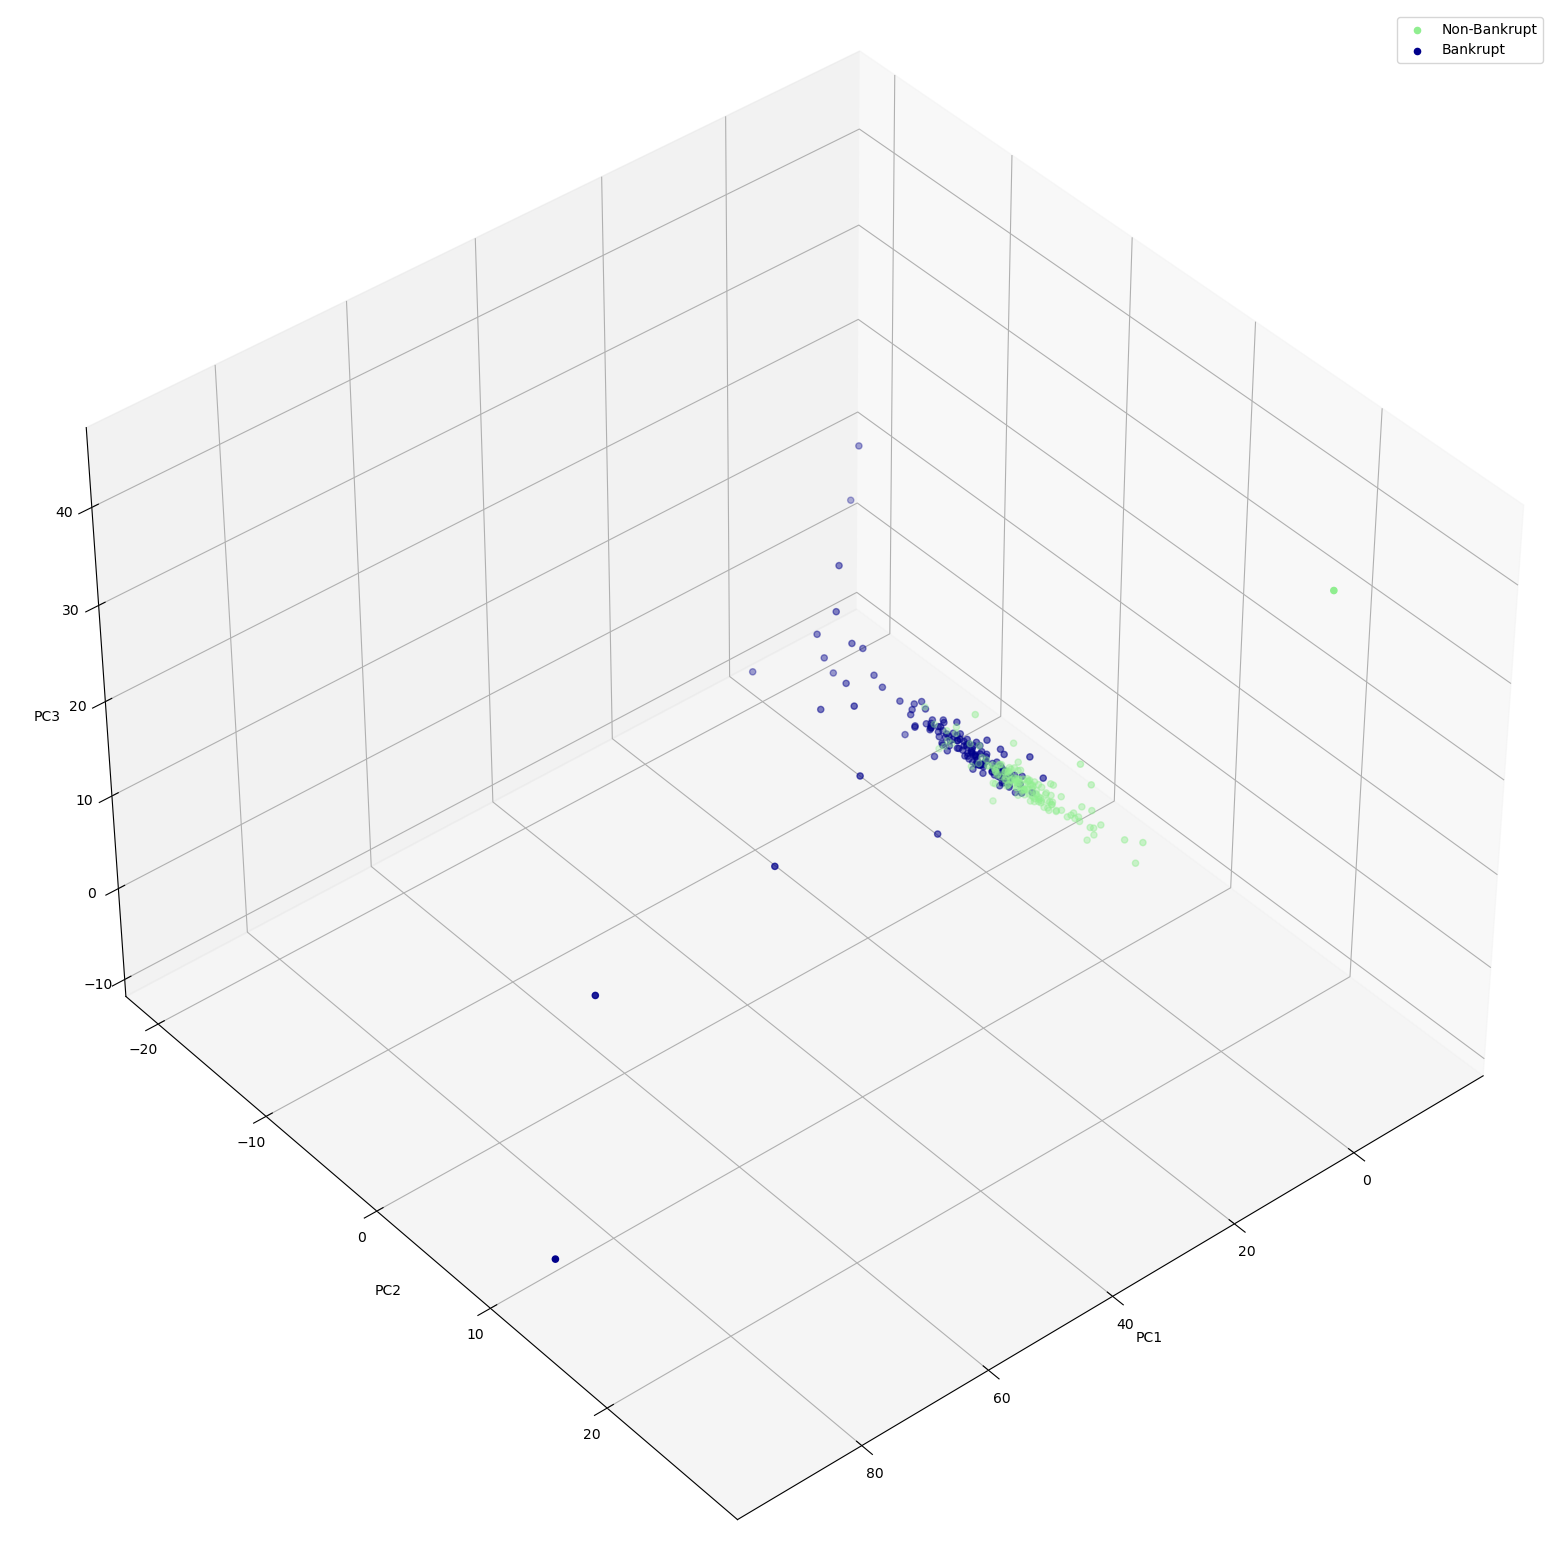

In [155]:
pca_visualization(X_resampled_undersampled, y_resampled_undersampled, 40)

*<font size="2"><center>There are significantly fewer plotted data points in the graph, and once more, there appears to be an overlap between Bankrupt and Non-Bankrupt observations, yet there is a threshold that Bankrupt instances do not cross.</center>*

---
Controlled Undersampling: Distance-based undersampling method.<br>
<br>**NearMiss-1:** Selects the majority observations with the smallest average distances to the N closest minority observations
<br>**NearMiss-2:** Selects the majority observations whose distances to the N farthest minority samples are the smallest
<br>**NearMiss-3**: Combines the features of NearMiss-1 and NearMiss-2

In [183]:
from imblearn.under_sampling import NearMiss
# NearMiss-1
nm1 = NearMiss(version=1)
X_resampled_nm1, y_resampled_nm1 = nm1.fit_resample(X_train, y_train)

Bankrupt?
0    142
1    142
Name: Bankrupt?, dtype: int64

% of Bankruptcy Occurrences: 50%


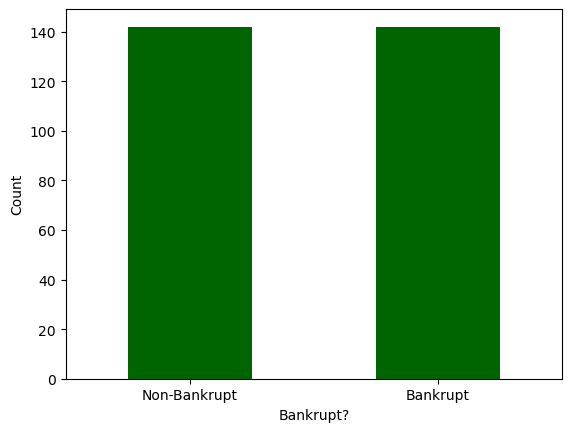

In [157]:
count_bankruptcies(y_resampled_nm1)

*<font size="2"><center>Unlike the entire dataset and normal training subset, the Controlled Undersampling subset under NearMiss-1 is equal in the amount of Bankrupt and Non-Bankrupt cases, but there are very few observations.</center>*

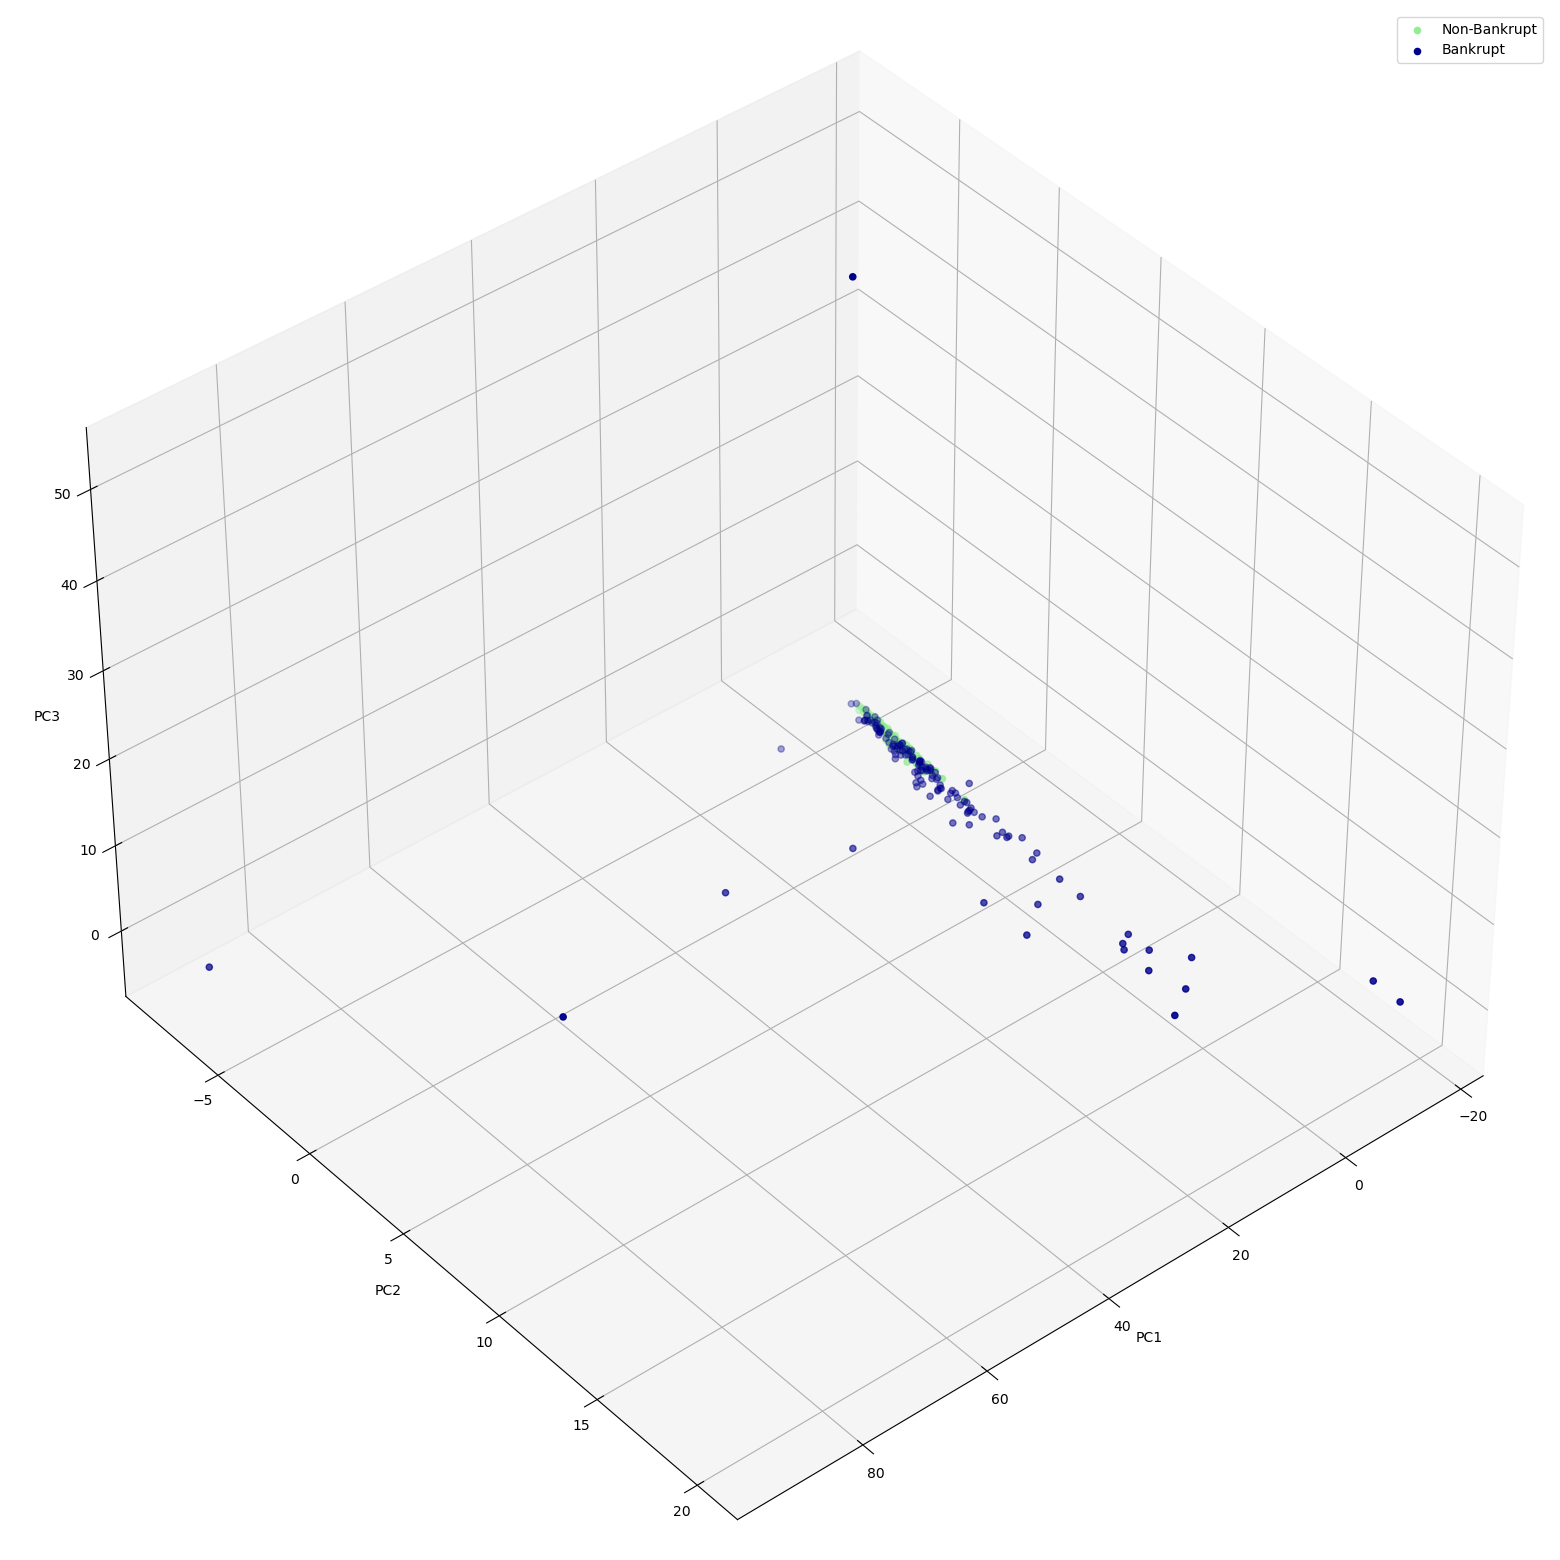

In [158]:
pca_visualization(X_resampled_nm1, y_resampled_nm1, 40)

*<font size="2"><center>While there is significant overlap between the Bankrupt and Non-Bankrupt cases, the Non-Bankrupt observations tend to cluster together, while the Bankrupt instances are more dispersed.</center>*

In [180]:
# NearMiss-2
nm2 = NearMiss(version=2)
X_resampled_nm2, y_resampled_nm2 = nm2.fit_resample(X_train, y_train)

Bankrupt?
0    142
1    142
Name: Bankrupt?, dtype: int64

% of Bankruptcy Occurrences: 50%


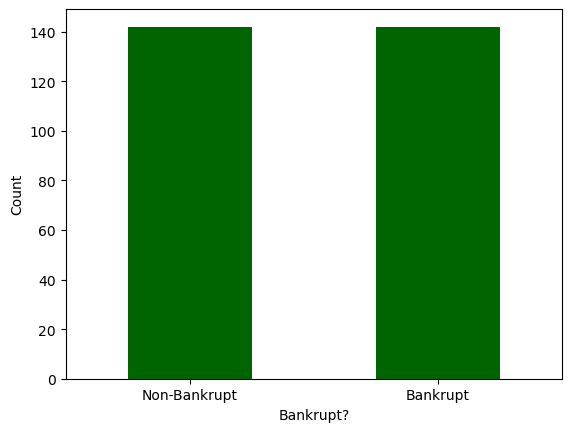

In [160]:
count_bankruptcies(y_resampled_nm2)

*<font size="2"><center>Unlike the entire dataset and normal training subset, the Controlled Undersampling subset under NearMiss-2 is equal in the amount of Bankrupt and Non-Bankrupt cases, but there are very few observations.</center>*

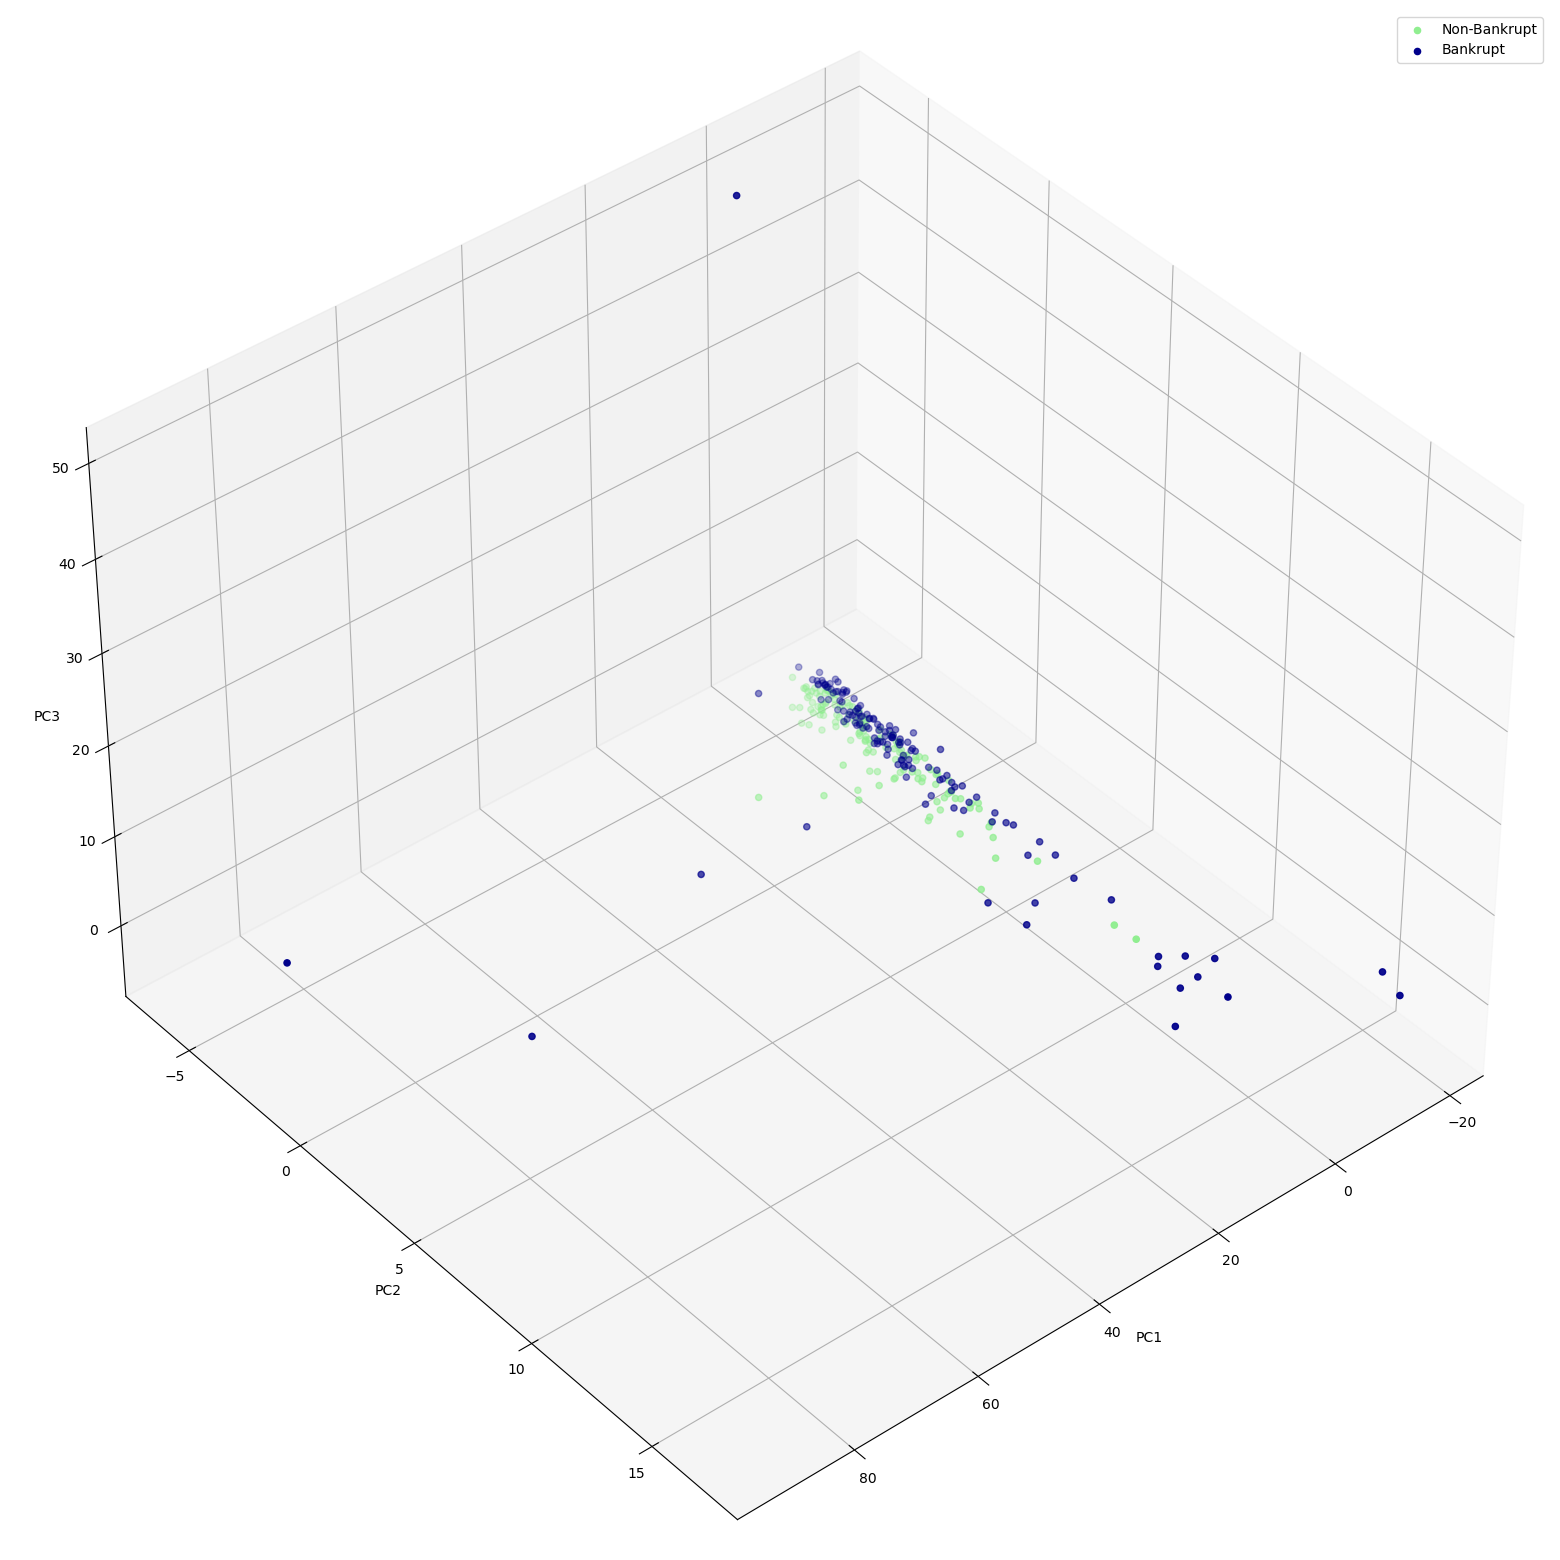

In [161]:
pca_visualization(X_resampled_nm2, y_resampled_nm2, 40)

*<font size="2"><center>The observations in the Bankrupt and Non-Bankrupt cases show greater dispersion, although some Bankrupt instances appear to be more outliers.</center>*

In [181]:
# NearMiss-3
nm3 = NearMiss(version=3)
X_resampled_nm3, y_resampled_nm3 = nm3.fit_resample(X_train, y_train)

Bankrupt?
0    142
1    142
Name: Bankrupt?, dtype: int64

% of Bankruptcy Occurrences: 50%


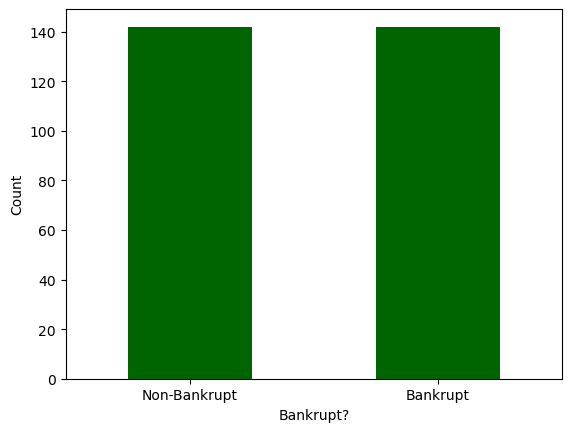

In [163]:
# Function that will create a plot of Bankruptcies vs. Non-Bankruptcies
count_bankruptcies(y_resampled_nm3)

*<font size="2"><center>Unlike the entire dataset and normal training subset, the Controlled Undersampling subset under NearMiss-3 is equal in the amount of Bankrupt and Non-Bankrupt cases, but there are very few observations.</center>*

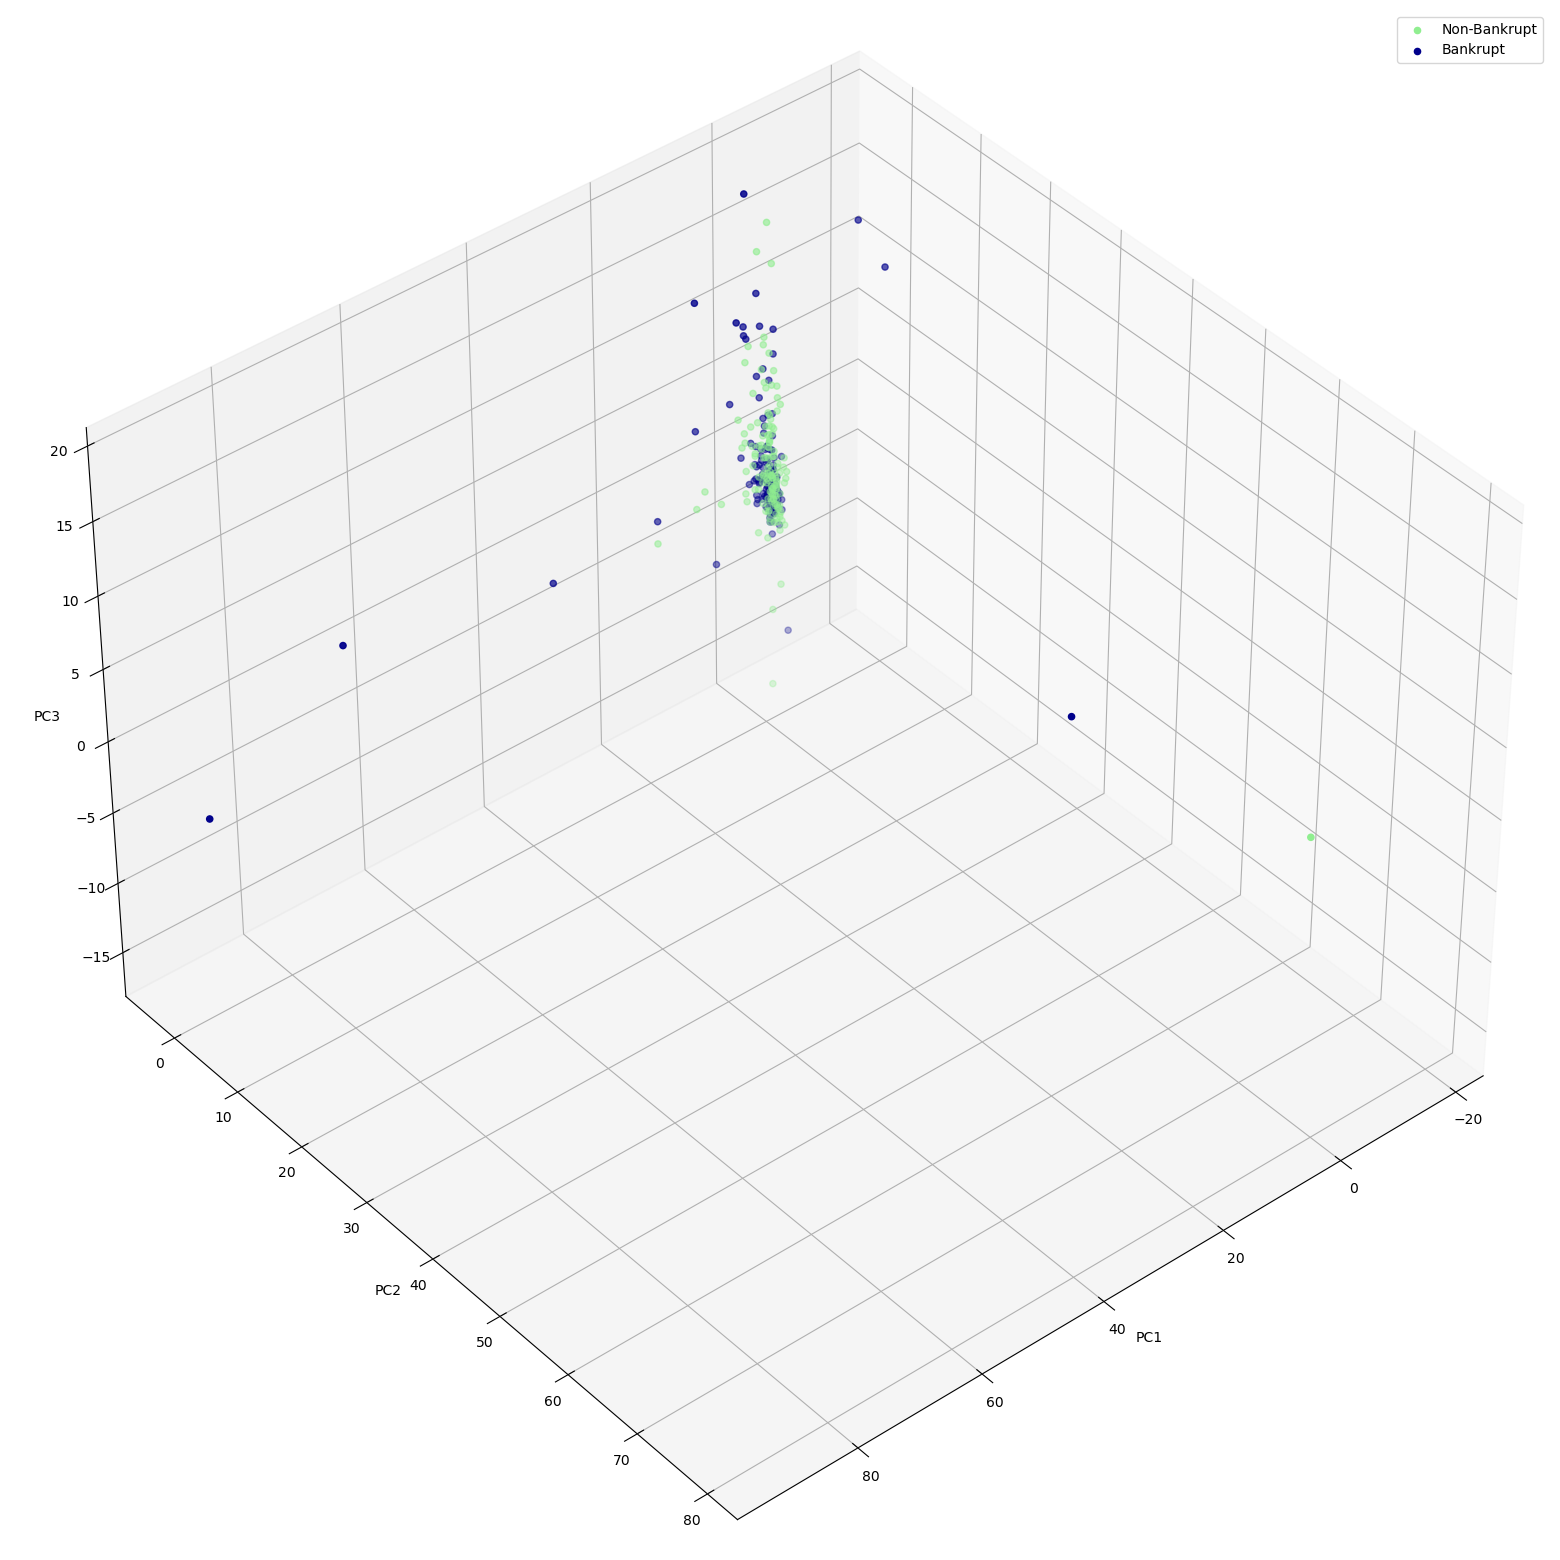

In [164]:
pca_visualization(X_resampled_nm3, y_resampled_nm3, 40)

*<font size="2"><center>The orientation of the data has changed in relation to NearMiss-1 and NearMiss-2. Similar to the NearMiss-2 plot, there is a significant amount of dispersion among Bankrupt and Non-Bankrupt instances, although some Bankrupt instances appear to be more outliers.</center>*

*<font size="4"><center>Model Selection: KNN, Extreme Gradient Boosting, Ridge Classifier, and Support Vector Machine </center>*

Our next step is to identify the optimal scaling method for our dataset and determine the best model among KNN, Extreme Gradient Boosting, and Support Vector Machines. We will fine-tune the hyperparameters of each model to achieve optimal performance.
    
After selecting the optimal model, we will use Forward Stepwise Selection to identify the most critical variables for predicting bankruptcy. We will also conduct a Partial F-Test to determine if there is a significant difference in the performance of a reduced model compared to a full model.

In [165]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier

In [166]:
# List of models
models = [KNeighborsClassifier(), RidgeClassifier(random_state=2), SVC(random_state=7), XGBClassifier(random_state=4)]
# List of X and y
inputs = [[X_train, y_train], [X_train_resampled_ADASYN, y_train_resampled_ADASYN], 
          [X_n_oversampling, y_n_oversampling], [X_resampled_undersampled, y_resampled_undersampled], 
          [X_resampled_nm3, y_resampled_nm3], [X_resampled_nm2, y_resampled_nm2], [X_resampled_nm1, y_resampled_nm1]]

---
*<center>Hyperparameter Tuning<center>*

**KNN**<sup>9</sup>
<br>n_neighbors: Number of neighboring data points to consider in prediction.
<br>weights: Weight function used in predictions.
<br>metric: Distance computation.
    
**RC**<sup>13</sup>
<br>alpha: Shrinks the magnitude of coefficients towards zero.
    
**SVC**<sup>14</sup>
<br>C: Controls trade-off between smooth decision boundary and classification data points

**XGB**<sup>15</sup>
<br>n_estimators: Number of trees used in the ensemble.
<br>max_depth: Maximum depth of the tree. 
<br>learning_rate: Step size shrinkage to prevent overfitting.

In [167]:
# KNN Parameters
knn_params = {
    'n_neighbors': [3, 5, 7], 
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
# Ridge Classification Parameters
rc_params = {
    'alpha': [0.01, 0.1, 10.0],
} 
# SVC Parameters
svc_params = {
    'C': [0.1, 1, 10] 
}
# XBG
xgb_params = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [3, 5, 7], 
    'learning_rate': [0.01, 0.1, 0.2]
}

In [168]:
parameters = [knn_params, rc_params, svc_params, xgb_params]

---
*<center>Optimal Model Selection<center>*

The code below iterates systematically through four different model types, appropriate parameter settings, and scaling methods to find the optimal model that balances AUC, Accuracy, Sensitivity, and Specificity.

In [169]:
import warnings
warnings.filterwarnings("ignore")

In [170]:
# Dataframe to save relevant information from trained models
df_outcome = pd.DataFrame({'Model': [], 'Parameters': [], 
                   'Scaling Type': [], 'Accuracy': [], 'Specificity': [], 
                   'Sensitivity': [], 'AUC Score': [], 'AUC Coords': []})

In [171]:
# Calculate the specificity and sensitivity score
def specificity_score(y_test, y_pred):
    tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()
    return tn / (tn + fp)
# Calculate the specificity and sensitivity score
def sensitivity_score(y_test, y_pred):
    tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()
    return tp / (tp + fn)

In [172]:
import itertools
"""Will iterate through each model and data scaling method to find the performance based on three metrics for all model variations."""
for model_type, tuning in zip(models, parameters):
    # It will grab the name of the model
    model = str(model_type)
    count = len(list(itertools.takewhile(lambda char: char != "(", model)))    
    model_name = model[:count]
    # Iterate through every type of sample selection
    for index, input_type in enumerate(inputs):
        # Grid search to tune the model
        grid_search = GridSearchCV(model_type, tuning, cv=2)
        grid_search.fit(input_type[0], input_type[1])
        y_pred = grid_search.predict(X_test) 
        # Classification Metrics
        accuracy = accuracy_score(y_test, y_pred)
        specificity = specificity_score(y_test, y_pred)
        sensitivity = sensitivity_score(y_test, y_pred)
        # Conditional statement that determines the best sample type per model and tuning parameters
        fpr, tpr, _ = roc_curve(y_test, y_pred, drop_intermediate=False)
        auc_coords = [fpr, tpr]
        auc_score = auc(fpr, tpr)
        # The parameters of the best grid search
        parameters = str(grid_search.best_estimator_)
        sample_type = index
        # New row will be added to data frame 
        new_row = {'Model': model_name, 'Parameters': parameters, 
                   'Scaling Type': index, 'Accuracy': accuracy, 'Specificity': specificity, 
                   'Sensitivity': sensitivity, 'AUC Score': auc_score, 'AUC Coords': auc_coords}
        df_outcome = df_outcome.append(new_row, ignore_index=True)

In [173]:
# Map to change the Sample types to the appropriate name
dict_map = {
    0.0: "Normal", 
    1.0: "ADASYN", 
    2.0: "Naïve Oversampling", 
    3.0: "Random Undersampling",
    4.0: "NearMiss-3", 
    5.0: "NearMiss-2",
    6.0: "NearMiss-1"
}
# Change display to show all information
pd.options.display.max_colwidth = None 
pd.options.display.expand_frame_repr = False
# Change the index to Model column
df_outcome["Scaling Type"] = df_outcome["Scaling Type"].map(dict_map)
ranked_df_outcome = df_outcome.sort_values(by='AUC Score', ascending=False)

In [174]:
# Print the top 3 models based on AUC
ranked_df_outcome = ranked_df_outcome.reset_index().drop("index", axis=1)
ranked_df_outcome

Model                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Parameters          Scaling Type  Accuracy  Specificity  Sensitivity  AUC Score                                                           AUC Coords
0                    SVC                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            SVC(C=1, random_state=7)  Random Undersampling  0.817693     0.897436     0.814533   0.855984    [[0.0, 0.18546747967479674, 1.0], [0.0, 0.8974358974358975, 1.0]]
1        RidgeClassifier                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          RidgeClassifier(alpha=0.1, random_state=2)    Naïve Oversampling  0.861681     0.846154     0.862297   0.854225    [[0.0, 0.13770325203252032, 1.0], [0.0, 0.8461538461538461, 1.0]]
2        RidgeClassifier                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         RidgeClassifier(alpha=10.0, random_state=2)  Random Undersampling  0.817204     0.871795     0.815041   0.843418    [[0.0, 0.18495934959349594, 1.0], [0.0, 0.8717948717948718, 1.0]]
3        RidgeClassifier                                                                                                                                                                                                                                                                                                                               

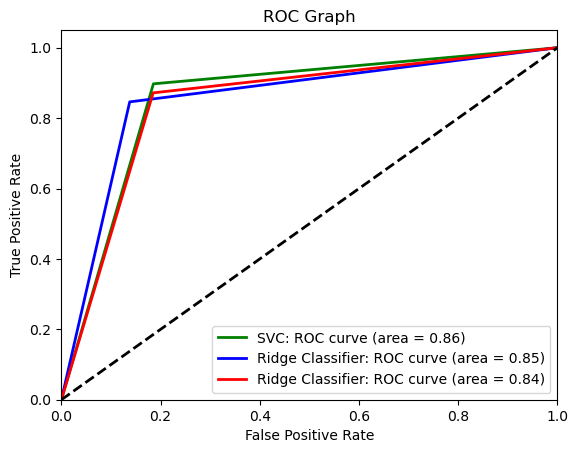

In [175]:
plt.figure()
# PLot the top 3 highest AUC curves
plt.plot(ranked_df_outcome["AUC Coords"][0][0], ranked_df_outcome["AUC Coords"][0][1], 
         color='green', lw=2, label='SVC: ROC curve (area = %0.2f)' % ranked_df_outcome["AUC Score"][0])
plt.plot(ranked_df_outcome["AUC Coords"][1][0], ranked_df_outcome["AUC Coords"][1][1], 
         color='blue', lw=2, label='Ridge Classifier: ROC curve (area = %0.2f)' % ranked_df_outcome["AUC Score"][1])
plt.plot(ranked_df_outcome["AUC Coords"][2][0], ranked_df_outcome["AUC Coords"][2][1], 
         color='red', lw=2, label='Ridge Classifier: ROC curve (area = %0.2f)' % ranked_df_outcome["AUC Score"][2])
# Graph will include the x and y axis
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

The Ridge Classifier, trained on the data that was scaled using Naïve Oversampling, demonstrated the most balanced performance across multiple evaluation metrics, including Accuracy, AUC, Specificity, and Sensitivity. With an AUC, the model has a degree of separation between the positive and negative classes.

Conversely, the other models tended to excel only in a single metric. For example, the KNeighborsClassifier model, trained without any scaling, achieved a high accuracy of 96% but a very low specificity of 11%, indicating its inability to capture the underlying trends necessary for predicting bankruptcy. In contrast, the Ridge Classifier was able to discern patterns and accurately predict both bankrupt and non-bankrupt instances.

While oversampling methods are generally not recommended, the results from controlled undersampling were not promising. Other sampling methods outperformed it regarding AUC, Accuracy, Specificity, and Sensitivity. 

---
*<center>Ridge Classification and Forward Stepwise Selection<center>*

In [176]:
# Fit RC based on its best tuned parameters
full_model = RidgeClassifier(alpha=0.1, random_state=2)	
full_model.fit(X_n_oversampling, y_n_oversampling)
y_pred = full_model.predict(X_test)
np.set_printoptions(suppress=True)
print("Intercept:", full_model.intercept_)
print("Coefficients:", full_model.coef_[0])

Intercept: [-0.52010447]
Coefficients: [ 0.20228856  0.09440332 -0.34723735 -0.76883745  1.39671364  0.15714751
  0.20186476  0.17074391  0.01143775 -0.37647543  0.03678587  0.00719175
 -0.09029039  0.00846217 -0.04424142 -1.39459704  0.51387286  0.85610312
 -0.15516041  0.07593933  0.04664507  0.36646357  0.02168419  0.00174802
  0.00079315 -0.08019903  0.13189996 -0.02014327 -0.02902959 -0.01364309
 -0.00211813  0.10658514 -0.00000055  0.00649963 -0.00756427  0.02851717
  0.09499013 -0.09499013  0.00893141  0.07131265  0.03117589 -0.17066479
 -0.12070152 -0.38266254  0.00065388 -0.04371326 -0.02564506 -0.01175764
  0.0923962  -0.16185248  0.00701409 -0.02912565 -0.01823177 -0.06914183
 -0.03445078  0.04491898 -0.05524929 -0.05068682  0.01351779  0.15082919
  0.1568896  -0.02387505  0.01041355  0.01674454  0.38074026  0.33426722
  0.00542598  0.02914988 -0.26804209 -0.03376001 -0.03736823  0.00243052
 -0.14390421 -0.14219752  0.09080621  0.00000279  0.01674454  0.33426722
  0.13741894

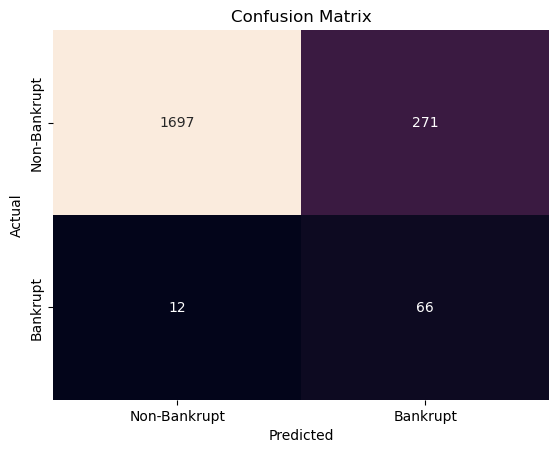

In [177]:
import seaborn as sns
# Print confusion matrix for optimal model
x_labels = ['Non-Bankrupt', 'Bankrupt'] 
y_labels = ['Non-Bankrupt', 'Bankrupt']
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False, fmt="d", 
            xticklabels=x_labels, yticklabels=y_labels)
# Set axis labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [178]:
print("Specificity: {:.0%}".format(66/(12+66)))  
print("Sensitivity: {:.0%}".format(1697/(1697+271)))  
print("Accuracy: {:.0%}".format(accuracy_score(y_test, y_pred)))  

Specificity: 85%
Sensitivity: 86%
Accuracy: 86%


**Specificity:** Out of all the classifications of Bankruptcy, the classifier was able to identify 85% correctly.
<br>**Sensitivity:** Out of all the classifications of Non-Bankruptcy, the classifier was able to identify 86% correctly.
<br>**Accuracy:** Out of the entire test dataset, the model was able to predict Bankrupt or Non-Bankrupt correctly 86% of the time.

---
**Forward Stepwise Selection:** The Sequential Feature Selector will add features to form a feature subset. At each stage, this estimator chooses the best feature to add based on the cross-validation score of an estimator for size n features.<sup>16</sup>

In [179]:
from sklearn.feature_selection import SequentialFeatureSelector
# Size of the reduced model
n_features_to_select = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# Selected columns per n_features_to_select
selected_columns = []
# Get the selected feature names per n_feature_to_select
for n_features in n_features_to_select:
    # Declare forward selection function selection
    sfs = SequentialFeatureSelector(full_model, n_features_to_select=n_features, direction='forward')
    # Fit the model using all of the data available since we want to find the subset of 
    # Critical features for the prediction of bankruptcy
    sfs.fit(X, y)
    # Get the selected feature indices
    selected_feature_indices = sfs.get_support(indices=True)
    selected_column_names = list(X.columns[selected_feature_indices])
    selected_columns.append(selected_column_names)
    # Print the selected feature names
    print("{} Selected Features: {}\n".format(n_features, selected_column_names))

10 Selected Features: [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Operating Expense Rate', ' Research and development expense rate', ' Per Share Net profit before tax (Yuan ¥)', ' Net Value Growth Rate', ' Working Capital/Equity']

20 Selected Features: [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' After-tax Net Profit Growth Rate', ' Ne

These top ten variables were identified as having the highest predictive power in determining whether a company is likely to go bankrupt using the Forward Stepwise Selection algorithm:

**ROA(C) before interest and depreciation:** Company's earnings before paying interest or depreciation *(EBITDA)* relative to its total assets.
<br>**ROA(A) before interest and % after tax:** Company's earnings before paying interest and after taxes *(NOPAT)* relative to its total assets.
<br>**Operating Gross Margin:** Profitability after subtracting operating expenses. 
<br>**Realized Sales Gross Margin:** Gross profit as a percentage of sales.
<br>**Operating Profit Rate:** Operating profit as a percentage of sales.
<br>**Operating Expense Rate:** Operating expenses as a percentage of sales.
<br>**Research and development expense rate:** R&D as a percentage of sales. 
<br>**Per Share Net profit before tax (Yuan ¥):** Shareholder earnings per share before accounting taxes. 
<br>**Net Value Growth Rate:** Track the overall value of a company over time by looking at assets minus liabilities.
<br>**Working Capital/Equity:** Measures the company's ability to meet short-term and long-term obligations.

These ratios make sense in their ability to predict if a company has gone bankrupt, as they provide insights into a company's financial health, asset efficiency, and profitability, which are important factors in determining bankruptcy risk.

---

Next, we will compare the performance of various reduced models with the full model.

In [184]:
from scipy import stats
# Select the X_train with the feature columns
for features in selected_columns:
    # Retrain the model with tuned parameters using the reduction in features
    reduced_model = RidgeClassifier(alpha=0.1, random_state=2)	
    reduced_model.fit(X_n_oversampling[features], y_n_oversampling)
    # Calculating appropriate classification metrics
    y_pred = reduced_model.predict(X_test[features])
    accuracy = accuracy_score(y_test, y_pred)
    specificity = specificity_score(y_test, y_pred)
    sensitivity = sensitivity_score(y_test, y_pred)
    # Print the summary statistics
    print("No. of Features {}:".format(len(features)))
    print("Accuracy: {}".format(accuracy))
    print("Specificity: {}".format(specificity))
    print("Sensitivity: {}".format(sensitivity))
    print("\n")

No. of Features 10:
Accuracy: 0.8274682306940372
Specificity: 0.7307692307692307
Sensitivity: 0.8313008130081301


No. of Features 20:
Accuracy: 0.8025415444770283
Specificity: 0.8205128205128205
Sensitivity: 0.801829268292683


No. of Features 30:
Accuracy: 0.8079178885630498
Specificity: 0.7948717948717948
Sensitivity: 0.8084349593495935


No. of Features 40:
Accuracy: 0.8172043010752689
Specificity: 0.8589743589743589
Sensitivity: 0.8155487804878049


No. of Features 50:
Accuracy: 0.8528836754643206
Specificity: 0.8461538461538461
Sensitivity: 0.853150406504065


No. of Features 60:
Accuracy: 0.8558162267839687
Specificity: 0.8076923076923077
Sensitivity: 0.8577235772357723


No. of Features 70:
Accuracy: 0.8484848484848485
Specificity: 0.8076923076923077
Sensitivity: 0.8501016260162602


No. of Features 80:
Accuracy: 0.8504398826979472
Specificity: 0.8076923076923077
Sensitivity: 0.8521341463414634


No. of Features 90:
Accuracy: 0.8607038123167156
Specificity: 0.8461538461538461
S

Based on the evaluation of classification models using Accuracy, Specificity, and Sensitivity metrics, it is evident that the reduced models are not as effective as the full model in predicting bankruptcy and non-bankruptcy instances. Therefore, the full model is recommended for predicting whether a company is in financial distress or bankrupt.

However, it may be impractical for Hedge Funds, Private Equity, and Investment Banks to collect all 95 financial features used in the full model. In such cases, using a subset of ten financial features could be a feasible option to achieve a reasonable level of prediction accuracy. However, using 20 financial features is recommended to achieve an ~80% balance across Accuracy, Sensitivity, and Specificity. Moreover, it appears that replicating the success of the full model would require at least 90 features.

**<font size="5">Discussion:**

**Conclusion:** After performing data scaling and training four models with tuned parameters, the Ridge Classifier with an alpha level of .1 was identified as the best model. The Naïve Oversampling technique worked best among the three scaling methodologies that address class imbalances, likely due to the model having more Bankrupt data points to learn from during the training process. Random Undersampling also worked well, even with a significant reduction in training instances, likely because the model had a balanced classification system to analyze.

Although models with the highest accuracy tended to work best for the non-scaled dataset, they did not perform well in classifying Bankrupt instances, resulting in a low average specificity of less than .11 and a high sensitivity of greater than .90. Therefore, we focused on sensitivity and specificity metrics to ensure a high percentage of accuracy in true Bankruptcy and true Non-Bankrupt observations. Unlike the Altman Z-Score, this model classifies a company as Bankrupt/Financially Distressed or not and uses a wider variety of ratios, indicating its generalizability across industries.

This model is a valuable tool for quickly screening companies, particularly for Hedge Funds, Private Equity, and Investment Banks with access to large financial databases.

**Limitations:** One limitation of the model is the large number of financial ratios required to predict a company's financial state, compared to the Altman Z-Score's five variables. However, four of the Altman Z-Score variables are asset-based, making it more suitable for industrial companies with a strong asset base. In contrast, the 94 ratios used in this model may be necessary for it to work across multiple industries. However, since the dataset did not include industry classification, it's unclear how well the model will perform for different industries. Additionally, future improvements could include incorporating qualitative data from earnings calls and financial reports to supplement the financial ratios. This approach has already been tested in previous studies, such as the *Bankruptcy prediction and the discriminatory power of annual reports: empirical evidence from financially distressed German companies*. 

The model may not fully apply to the American market as it was trained using Taiwanese companies. However, it is worth noting that recent interest rate movements in the United States and Taiwan have exhibited a strong correlation, leading to similar monetary policies. Therefore, the trained models may also apply to American corporations, provided that monetary policies and business cycles stay the same across the two countries.

<center><iframe src="https://d3fy651gv2fhd3.cloudfront.net/embed/?s=taiwanintrat&v=202305050605V20230410&d1=20130509&title=false&url2=/united-states/interbank-rate&h=300&w=600" height="300" width="600" frameborder="0" scrolling="no"></iframe><center>

    
*<font size="2"><center>**Source:** Trading Economics<sup>17</sup><center>*

Despite this, it is important to recognize that differences in regulations and economic factors, and industry-specific characteristics may affect the applicability of the model to the USA. Since Bankruptcy laws are different between the USA and Taiwan, thus, curating a dataset with a large variety of industries and designations for American companies would improve the results of future studies, ensuring the model's generalizability to many industries.

**<font size="5">Sources:**

1. “Chapter 7 - Bankruptcy Basics,” United States Courts, accessed February 19, 2023, https://www.uscourts.gov/services-forms/bankruptcy/bankruptcy-basics/chapter-7-bankruptcy-basics#:~:text=A%20chapter%207%20bankruptcy%20case,provisions%20of%20the%20Bankruptcy%20Code.
    
2. “Chapter 11 - Bankruptcy Basics,” United States Courts, accessed February 19, 2023, https://www.uscourts.gov/services-forms/bankruptcy/bankruptcy-basics/chapter-11-bankruptcy-basics.

3. Hayes, Adam. “Financial Distress: Definition, Signs, and Remedies.” Investopedia, Investopedia, 17 Feb. 2023, https://www.investopedia.com/terms/f/financial_distress.asp#:~:text=Financial%20distress%20is%20a%20condition,revenues%20sensitive%20to%20economic%20downturns. 
    
4. Will Kenton, “Altman Z-Score: What It Is, Formula, How to Interpret Results,” Investopedia (Investopedia, January 22, 2023), https://www.investopedia.com/terms/a/altman.asp#:~:text=The%20Altman%20Z%2Dscore%20is%20a%20formula%20for%20determining%20whether,%2C%20solvency%2C%20and%20activity%20ratios.

5. Christian Lohmann and Thorsten Ohliger, “Bankruptcy Prediction and the Discriminatory Power of Annual Reports: Empirical Evidence from Financially Distressed German Companies,” Journal of Business Economics 90, no. 1 (2019): pp. 137-172, https://doi.org/10.1007/s11573-019-00938-1.

6. Fedesoriano, “Company Bankruptcy Prediction,” Kaggle, February 13, 2021, https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction.

7. Bloomenthal, Andrew. “Financial Ratio Analysis: Definition, Types, Examples, and How to Use.” Investopedia, Investopedia, 20 Mar. 2023, https://www.investopedia.com/terms/r/ratioanalysis.asp#:~:text=Financial%20ratio%20analysis%20is%20often,coverage%2C%20and%20market%20prospects%20ratios.

8. “Penalized Logistic Regression Essentials in R: Ridge, Lasso and Elastic Net.” STHDA, 11 Mar. 2018, http://www.sthda.com/english/articles/36-classification-methods-essentials/149-penalized-logistic-regression-essentials-in-r-ridge-lasso-and-elastic-net/. 

9. “Sklearn.neighbors.kneighborsclassifier.” Scikit, https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html. 

10. Dobilas, Saul. “XGBoost: Extreme Gradient Boosting - How to Improve on Regular Gradient Boosting?” Medium, Towards Data Science, 5 Feb. 2022, https://towardsdatascience.com/xgboost-extreme-gradient-boosting-how-to-improve-on-regular-gradient-boosting-5c6acf66c70a.

11. “Ridge Classification Concepts &amp; Python Examples.” Data Analytics, 3 Oct. 2022, https://vitalflux.com/ridge-classification-concepts-python-examples/#:~:text=In%20machine%20learning%2C%20ridge%20classification,model%20coefficients%20to%20prevent%20overfitting. 

12. “1.4. Support Vector Machines.” Scikit, https://scikit-learn.org/stable/modules/svm.html. 

13. Jain, Aarshay. “A Complete Tutorial on Ridge and Lasso Regression in Python (Updated 2023).” Analytics Vidhya, 29 Mar. 2023, https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/. 

14. Fraj, Mohtadi Ben. “In Depth: Parameter Tuning for SVC.” Medium, All Things AI, 5 Jan. 2018, https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769#:~:text=the%20training%20data-,C,classifying%20the%20training%20points%20correctly.&amp;text=Increasing%20C%20values%20may%20lead%20to%20overfitting%20the%20training%20data. 

15. prashant111. “A Guide on XGBoost Hyperparameters Tuning.” Kaggle, Kaggle, 15 July 2020, https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning. 

16. “Sklearn.feature_selection.Sequentialfeatureselector.” Scikit, https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html. 

17. “Taiwan Three Month Interbank RATE2023 Data - 2005-2022 Historical - 2024 Forecast.” Taiwan Three Month Interbank Rate - 2023 Data - 2005-2022 Historical - 2024 Forecast, https://tradingeconomics.com/taiwan/interbank-rate. 